In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
import pickle
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

# Load prepared data

In [41]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+'models/'

## fmap mean all experiments

In [62]:
# file_mean = save_path+"fmap_mean_32to38.txt"
file_mean = save_path+"fmap_mean_erode.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [63]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046272 entries, 0 to 5046271
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 423.5 MB


# Split data

## Data 1. fmap mean all experiments

In [65]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [66]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(4685824, 11)
(180224, 11)
(180224, 11)


In [67]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [68]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(4685824, 5)
(4685824,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [69]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

## Data4: None zero

In [70]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [71]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
34920,36,1,8,33,40,17.758072,3.100749,-27.108955,-54.541569,-65.580933,6.323732
34921,36,1,8,33,41,-171.797119,-187.157349,-216.839035,-243.115356,-255.319305,5.692159
34922,36,1,8,33,42,-384.395447,-400.023895,-428.779266,-454.553436,-467.434479,5.156662
34923,36,1,8,33,43,-597.038513,-613.454895,-641.396118,-666.766907,-679.730591,4.694756
34959,36,1,8,34,15,-1179.840454,-1197.678955,-1222.885254,-1246.201660,-1258.513672,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
5003809,35,5,33,40,33,-233.451859,-219.373581,-219.398911,-222.292938,-216.633850,20.445215
5003810,35,5,33,40,34,-249.901581,-236.660583,-236.275848,-238.081451,-233.357391,15.309294
5003811,35,5,33,40,35,-230.639755,-218.042419,-217.110458,-218.660629,-214.294983,12.231406
5003812,35,5,33,40,36,-186.973434,-174.493347,-173.302063,-174.678192,-170.903381,10.196120


In [72]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [73]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [74]:
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(694168, 5)
(694168,)
(27092, 5)
(27092,)
(27093, 5)
(27093,)


# Neural Network

## Find out best layer and units

In [19]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(870485, 5)
(870485,)
(34011, 5)
(34011,)


In [63]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [172]:
def create_nn(layer_size, unit_size):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_size, activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_size, activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [203]:
max_range_layer = 11
max_range_unit = 11
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
for i in range(1, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    for j in range(1, max_range_unit):
        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_nn(i, j)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
    
    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Layer:1 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 27s 949us/step - loss: 1622.7350 - accuracy: 0.0637 - val_loss: 59.0192 - val_accuracy: 0.0000e+00
Epoch 2/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.6579 - accuracy: 1.2096e-04 - val_loss: 58.8350 - val_accuracy: 1.8865e-04
Epoch 3/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.9312 - accuracy: 1.2984e-04 - val_loss: 56.4048 - val_accuracy: 0.0000e+00
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 56.0702 - accuracy: 1.0542e-04 - val_loss: 60.1063 - val_accuracy: 1.7756e-04
Epoch 5/100
28160/28160 [==============================] - 26s 926us/step - loss: 55.7474 - accuracy: 1.1097e-04 - val_loss: 61.5973 - val_accuracy: 0.0000e+00
Epoch 6/100
28160/28160 [==============================] - 26s 930us/step - loss: 55.7187 - accuracy: 1.0875e-04 - val_loss: 56.2519 - val_accuracy: 1.8311e-04
Epoch 7/100
281

Epoch 6/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.7177 - accuracy: 1.1874e-04 - val_loss: 55.5720 - val_accuracy: 0.0000e+00
Epoch 7/100
28160/28160 [==============================] - 24s 853us/step - loss: 55.5480 - accuracy: 1.0875e-04 - val_loss: 54.5475 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 24s 852us/step - loss: 55.3381 - accuracy: 1.1430e-04 - val_loss: 58.7836 - val_accuracy: 2.7743e-05
Epoch 9/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.4413 - accuracy: 1.1430e-04 - val_loss: 59.4935 - val_accuracy: 1.8865e-04
Epoch 10/100
28160/28160 [==============================] - 24s 854us/step - loss: 55.5529 - accuracy: 1.1763e-04 - val_loss: 55.7116 - val_accuracy: 5.5487e-06
Epoch 11/100
28160/28160 [==============================] - 24s 858us/step - loss: 55.7188 - accuracy: 1.1652e-04 - val_loss: 56.3565 - val_accuracy: 5.5487e-06
Epoch 12/100
28160/28160 [============

28160/28160 [==============================] - 28s 1ms/step - loss: 28.1126 - accuracy: 0.8113 - val_loss: 29.2738 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 26s 911us/step - loss: 27.1445 - accuracy: 0.8113 - val_loss: 31.4884 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 26s 916us/step - loss: 26.7425 - accuracy: 0.8113 - val_loss: 26.7324 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 25.4802 - accuracy: 0.8113 - val_loss: 25.4726 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 26s 914us/step - loss: 25.7452 - accuracy: 0.8114 - val_loss: 24.7987 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 913us/step - loss: 24.0829 - accuracy: 0.8114 - val_loss: 34.7002 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.8517 - accur

Epoch 12/100
28160/28160 [==============================] - 26s 909us/step - loss: 24.5357 - accuracy: 0.8114 - val_loss: 23.3538 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 907us/step - loss: 24.2724 - accuracy: 0.8114 - val_loss: 23.3102 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.1696 - accuracy: 0.8114 - val_loss: 26.1382 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 26s 921us/step - loss: 23.2271 - accuracy: 0.8114 - val_loss: 19.3853 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 26s 913us/step - loss: 22.1799 - accuracy: 0.8114 - val_loss: 29.7477 - val_accuracy: 0.8114
Epoch 17/100
28160/28160 [==============================] - 26s 909us/step - loss: 22.3239 - accuracy: 0.8113 - val_loss: 19.6269 - val_accuracy: 0.8112
Epoch 18/100
28160/28160 [==============================] - 26s 911us/step - loss:

28160/28160 [==============================] - 26s 908us/step - loss: 27.5573 - accuracy: 0.8114 - val_loss: 37.9400 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 26s 909us/step - loss: 25.5927 - accuracy: 0.8114 - val_loss: 24.7688 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 929us/step - loss: 24.3192 - accuracy: 0.8114 - val_loss: 29.1826 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 26s 919us/step - loss: 23.5415 - accuracy: 0.8114 - val_loss: 22.6640 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 926us/step - loss: 23.3347 - accuracy: 0.8114 - val_loss: 21.6521 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 28s 981us/step - loss: 23.1001 - accuracy: 0.8114 - val_loss: 24.5581 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 28s 988us/step - loss: 24.0384 - accu

Epoch 13/100
28160/28160 [==============================] - 26s 935us/step - loss: 12.6412 - accuracy: 0.7673 - val_loss: 11.5847 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.1391 - accuracy: 0.7693 - val_loss: 11.6681 - val_accuracy: 0.8112
Epoch 15/100
5632/5632 [==============================] - 4s 749us/step - loss: 11.4569 - accuracy: 0.8112
##### Layer:3 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 26s 929us/step - loss: 215.3745 - accuracy: 0.1395 - val_loss: 37.8215 - val_accuracy: 1.6646e-05
Epoch 2/100
28160/28160 [==============================] - 26s 928us/step - loss: 27.1999 - accuracy: 0.5950 - val_loss: 23.4988 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 27s 967us/step - loss: 20.4521 - accuracy: 0.8114 - val_loss: 23.4609 - val_accuracy: 0.8114
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 19.1715 - accurac

28160/28160 [==============================] - 27s 942us/step - loss: 13.8986 - accuracy: 0.8110 - val_loss: 14.8802 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.7027 - accuracy: 0.8114 - val_loss: 14.3903 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 26s 933us/step - loss: 13.4343 - accuracy: 0.8114 - val_loss: 14.0424 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.2364 - accuracy: 0.8097 - val_loss: 14.2382 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.9927 - accuracy: 0.8112 - val_loss: 14.1223 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 932us/step - loss: 13.1283 - accuracy: 0.8107 - val_loss: 16.6140 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 26s 933us/step - loss: 12.7784 - accur

Epoch 6/100
28160/28160 [==============================] - 26s 940us/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6975 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 27s 941us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 27s 942us/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 27s 945us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6967 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 27s 943us/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.7008 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 755us/step - loss: 54.6970 - accuracy: 5.5487e-06
##### Layer:4 Unit:2 #####
Epoch 1/100
28160/28160 [==============================] - 27

Epoch 10/100
28160/28160 [==============================] - 27s 961us/step - loss: 12.2540 - accuracy: 0.8106 - val_loss: 11.5491 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 959us/step - loss: 12.3361 - accuracy: 0.8112 - val_loss: 13.3024 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7930 - accuracy: 0.8106 - val_loss: 11.4537 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7273 - accuracy: 0.8112 - val_loss: 11.8885 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 958us/step - loss: 11.5686 - accuracy: 0.8114 - val_loss: 11.1128 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 27s 953us/step - loss: 11.2863 - accuracy: 0.8114 - val_loss: 11.5168 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 27s 961us/step - loss:

28160/28160 [==============================] - 28s 989us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7009 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 28s 986us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6981 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 28s 989us/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6977 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7019 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] -

28160/28160 [==============================] - 28s 987us/step - loss: 11.1486 - accuracy: 0.8114 - val_loss: 10.5247 - val_accuracy: 0.8114
Epoch 17/100
5632/5632 [==============================] - 4s 776us/step - loss: 10.2826 - accuracy: 0.8112
##### Layer:5 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 28s 997us/step - loss: 31.2494 - accuracy: 0.8112 - val_loss: 22.9585 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 28s 987us/step - loss: 17.1868 - accuracy: 0.8112 - val_loss: 18.0133 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 28s 988us/step - loss: 17.6228 - accuracy: 0.8112 - val_loss: 16.8341 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 28s 986us/step - loss: 14.2042 - accuracy: 0.8112 - val_loss: 16.4548 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 28s 991us/step - loss: 14.6130 - accuracy: 0.8097 - val_los

28160/28160 [==============================] - 29s 1ms/step - loss: 19.4404 - accuracy: 0.8092 - val_loss: 14.8647 - val_accuracy: 0.8114
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.5127 - accuracy: 0.7950 - val_loss: 26.4252 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.1695 - accuracy: 0.8101 - val_loss: 13.6262 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 18.9767 - accuracy: 0.8103 - val_loss: 13.5191 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.5585 - accuracy: 0.8110 - val_loss: 11.9598 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.6823 - accuracy: 0.7886 - val_loss: 40.9895 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.9787 - accuracy: 0.8109 - va

Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.5918 - accuracy: 0.7903 - val_loss: 12.1188 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.0725 - accuracy: 0.8065 - val_loss: 15.6989 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.1823 - accuracy: 0.8096 - val_loss: 26.6462 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.2796 - accuracy: 0.8106 - val_loss: 11.4260 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1569 - accuracy: 0.8093 - val_loss: 18.7560 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.3967 - accuracy: 0.8094 - val_loss: 12.0654 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.9484 - accuracy

Epoch 7/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7154 - accuracy: 0.8112 - val_loss: 11.2682 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.5396 - accuracy: 0.8112 - val_loss: 10.5479 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.3986 - accuracy: 0.8112 - val_loss: 10.4961 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 999us/step - loss: 11.5263 - accuracy: 0.8112 - val_loss: 10.7674 - val_accuracy: 0.8112
Epoch 11/100
5632/5632 [==============================] - 4s 761us/step - loss: 11.1607 - accuracy: 0.8112
##### Layer:7 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.8693 - accuracy: 0.0190 - val_loss: 54.6972 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-0

Epoch 4/100
28160/28160 [==============================] - 29s 1ms/step - loss: 14.5050 - accuracy: 0.8111 - val_loss: 11.1388 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1807 - accuracy: 0.8110 - val_loss: 12.0496 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6696 - accuracy: 0.8111 - val_loss: 10.8371 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4133 - accuracy: 0.8110 - val_loss: 10.6995 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.2951 - accuracy: 0.8108 - val_loss: 11.3119 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.3853 - accuracy: 0.8108 - val_loss: 9.8923 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.2056 - accuracy: 

28160/28160 [==============================] - 30s 1ms/step - loss: 12.8222 - accuracy: 0.8113 - val_loss: 12.5527 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.3497 - accuracy: 0.8113 - val_loss: 12.3709 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.2229 - accuracy: 0.8112 - val_loss: 12.4372 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.0755 - accuracy: 0.8112 - val_loss: 11.2684 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.6671 - accuracy: 0.8112 - val_loss: 11.0530 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.5910 - accuracy: 0.8113 - val_loss: 10.5131 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.3253 - accuracy: 0.8112 - val

Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.0623 - accuracy: 0.8035 - val_loss: 27.8250 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.8291 - accuracy: 0.8030 - val_loss: 12.5160 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7920 - accuracy: 0.8047 - val_loss: 14.6351 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1092 - accuracy: 0.8029 - val_loss: 12.0661 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 34s 1ms/step - loss: 11.8680 - accuracy: 0.8024 - val_loss: 10.5607 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 11.8273 - accuracy: 0.7993 - val_loss: 11.0123 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 35s 1ms/step - loss: 12.2658 - accuracy: 

28160/28160 [==============================] - 32s 1ms/step - loss: 11.3449 - accuracy: 0.8112 - val_loss: 10.9629 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.3685 - accuracy: 0.8112 - val_loss: 10.2441 - val_accuracy: 0.8112
Epoch 13/100
5632/5632 [==============================] - 5s 802us/step - loss: 10.5168 - accuracy: 0.8112
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 20.1568 - accuracy: 0.8019 - val_loss: 13.2738 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.5765 - accuracy: 0.8049 - val_loss: 11.0895 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.9081 - accuracy: 0.8064 - val_loss: 12.2557 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.8293 - accuracy: 0.8074 - val_loss: 10.1148 

28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6980 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6954 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7020 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7029 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 37s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7027 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 54.6999 - accuracy: 5.5487e-06 - val_loss: 54.7006 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 37s 1

Epoch 6/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.4397 - accuracy: 0.8113 - val_loss: 14.2656 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.6454 - accuracy: 0.8114 - val_loss: 11.2311 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 46s 2ms/step - loss: 12.8084 - accuracy: 0.8111 - val_loss: 11.3101 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.1541 - accuracy: 0.8112 - val_loss: 10.3025 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.2040 - accuracy: 0.8112 - val_loss: 10.3590 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.0281 - accuracy: 0.8113 - val_loss: 11.1012 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 46s 2ms/step - loss: 10.9895 - accurac

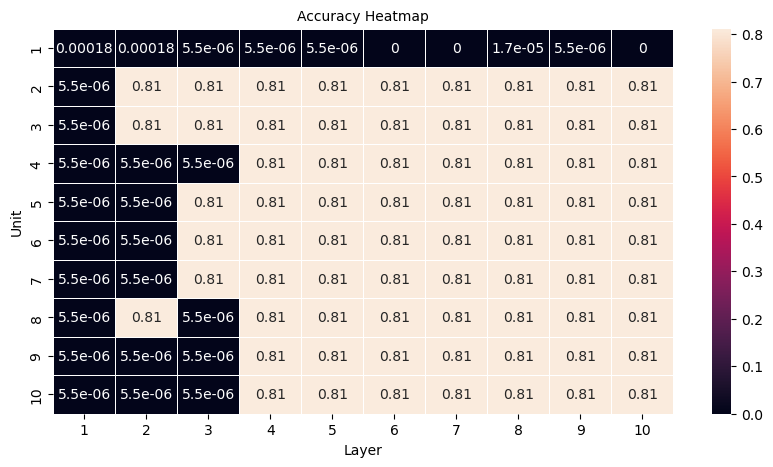

In [219]:
xlabels = range(1, max_range_unit)
ylabels = range(1, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

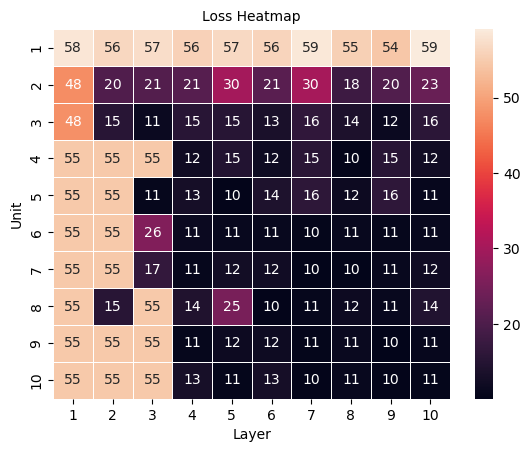

In [221]:
#fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(loss_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

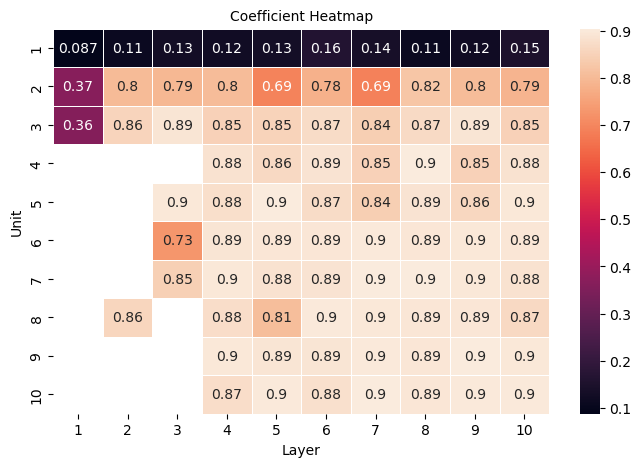

In [224]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

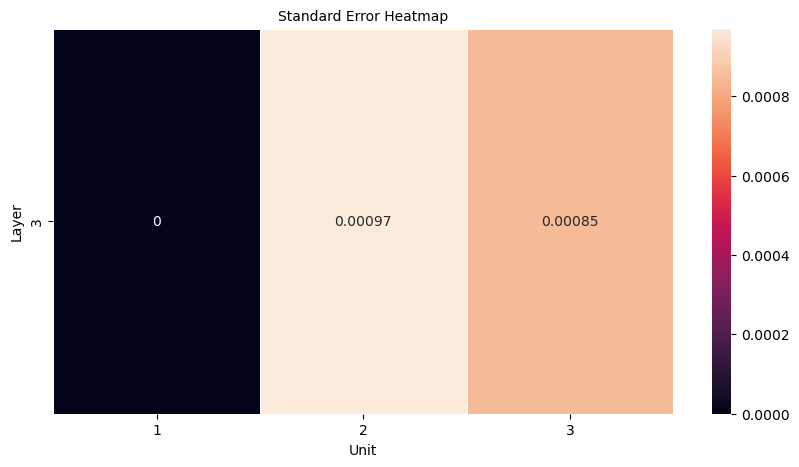

In [286]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

### Different unit size

In [273]:
def create_different_unit_nn(layer_size, unit_sizes):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_sizes[0], activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_sizes[i-1], activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [288]:
max_range_layer = 11
max_range_unit = 11
acc_arr2 = []
loss_arr2 = []
coef_arr2 = []
err_arr2 = []
size_arr2 = []
for i in range(3, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_different_unit_nn(i, units)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
        size_unit(units)
    
    acc_arr2.append(acc_unit)
    loss_arr2.append(loss_unit)
    coef_arr2.append(coef_unit)
    err_arr2.append(err_unit)
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 30s 1ms/step - loss: 82.3526 - accuracy: 0.0904 - val_loss: 47.7263 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 29s 1ms/step - loss: 40.7908 - accuracy: 5.5487e-06 - val_loss: 47.1735 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 40.8579 - accuracy: 5.5487e-06 - val_loss: 47.2789 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 40.7323 - accuracy: 5.5487e-06 - val_loss: 47.2703 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 40.8503 - accuracy: 5.5487e-06 - val_loss: 47.2838 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 31s 1ms/step - loss: 40.8853 - accuracy: 5.5487e-06 - val_loss: 47.5960 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [====

28160/28160 [==============================] - 30s 1ms/step - loss: 18.0804 - accuracy: 0.4067 - val_loss: 18.7812 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 928us/step - loss: 18.7898 - accuracy: 0.6534 - val_loss: 14.9118 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 1825s 65ms/step - loss: 15.8776 - accuracy: 0.6411 - val_loss: 17.0777 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 939us/step - loss: 14.0130 - accuracy: 0.8114 - val_loss: 13.3281 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 924s 33ms/step - loss: 14.5508 - accuracy: 0.7401 - val_loss: 14.4592 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 13.8873 - accuracy: 0.8114 - val_loss: 13.6286 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 942us/step - loss: 13.4420 - accura

28160/28160 [==============================] - 28s 977us/step - loss: 12.0501 - accuracy: 0.8114 - val_loss: 11.8449 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 12.1363 - accuracy: 0.8114 - val_loss: 12.7538 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 979us/step - loss: 11.9761 - accuracy: 0.8114 - val_loss: 11.7755 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 963us/step - loss: 11.8840 - accuracy: 0.8114 - val_loss: 11.8231 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9246 - accuracy: 0.8114 - val_loss: 12.2749 - val_accuracy: 0.8114
Epoch 13/100
5632/5632 [==============================] - 4s 759us/step - loss: 11.8164 - accuracy: 0.8114
##### Layer:4 Unit:5 #####
Epoch 1/100
28160/28160 [==============================] - 27s 954us/step - loss: 10275.0479 - accuracy: 0.2450 - val_l

28160/28160 [==============================] - 1126s 40ms/step - loss: 15.5145 - accuracy: 0.8113 - val_loss: 15.4497 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 27s 949us/step - loss: 13.7325 - accuracy: 0.8113 - val_loss: 14.2192 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 27s 967us/step - loss: 12.4976 - accuracy: 0.8112 - val_loss: 13.1986 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 555s 20ms/step - loss: 12.6067 - accuracy: 0.8112 - val_loss: 12.4234 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1778 - accuracy: 0.8110 - val_loss: 12.0861 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.0679 - accuracy: 0.8112 - val_loss: 14.7665 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7176 - accuracy: 0.8

28160/28160 [==============================] - 29s 1ms/step - loss: 12.3602 - accuracy: 0.8113 - val_loss: 13.1564 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.2229 - accuracy: 0.8111 - val_loss: 11.2359 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.8366 - accuracy: 0.8113 - val_loss: 11.4466 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6033 - accuracy: 0.8113 - val_loss: 12.2527 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4801 - accuracy: 0.8112 - val_loss: 10.9577 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.5032 - accuracy: 0.8113 - val_loss: 11.8089 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4582 - accuracy: 0.8113 -

Epoch 10/100
28160/28160 [==============================] - 38s 1ms/step - loss: 11.7218 - accuracy: 0.8114 - val_loss: 12.8822 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 39s 1ms/step - loss: 12.0761 - accuracy: 0.8113 - val_loss: 13.5324 - val_accuracy: 0.8112
Epoch 12/100
5632/5632 [==============================] - 7s 1ms/step - loss: 11.4044 - accuracy: 0.8112
##### Layer:6 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 42s 1ms/step - loss: 26.9500 - accuracy: 0.5179 - val_loss: 26.1151 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 42s 1ms/step - loss: 16.6773 - accuracy: 0.8112 - val_loss: 13.7098 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 39s 1ms/step - loss: 14.7945 - accuracy: 0.8112 - val_loss: 14.7303 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 36s 1ms/step - loss: 13.7194 - accuracy: 0.8087 - val_los

Epoch 5/100
28160/28160 [==============================] - 51s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6988 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6991 - accuracy: 5.5487e-06 - val_loss: 54.6983 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6963 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6992 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [===========================

28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7011 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7010 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 79

28160/28160 [==============================] - 32s 1ms/step - loss: 14.5835 - accuracy: 0.8107 - val_loss: 13.9292 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.4296 - accuracy: 0.8107 - val_loss: 15.4259 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.6122 - accuracy: 0.8112 - val_loss: 20.6199 - val_accuracy: 0.8114
Epoch 14/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.4682 - accuracy: 0.8109 - val_loss: 19.8791 - val_accuracy: 0.8112
Epoch 15/100
28160/28160 [==============================] - 31s 1ms/step - loss: 15.0370 - accuracy: 0.8113 - val_loss: 38.0089 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.7497 - accuracy: 0.8113 - val_loss: 13.1482 - val_accuracy: 0.8112
Epoch 17/100
28160/28160 [==============================] - 30s 1ms/step - loss: 13.1384 - accuracy: 0.8112

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6969 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 787us/step - loss: 54.6964 - accuracy: 5.5487e-06
##### Layer:9 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 24.3821 - accuracy: 0.5252 - val_loss: 16.5912 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.0940 - accuracy: 0.8113 - val_loss: 12.3550 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7025 - accuracy:

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6992 - accuracy: 5.5487e-06 - val_loss: 54.6997 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 5s 803us/step - loss: 54.6966 - accuracy: 5.5487e-06
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 32s 1ms/step - loss: 22.2618 - accuracy: 0.6168 - val_loss: 11.8126 - val_accuracy: 0.8114
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 13.6988 - accuracy: 0.8047 - val_loss: 20.8246 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.1737 - accuracy:

5632/5632 [==============================] - 5s 837us/step - loss: 54.6978 - accuracy: 5.5487e-06
##### Layer:10 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 33s 1ms/step - loss: 25.9155 - accuracy: 0.7380 - val_loss: 18.8334 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 14.1379 - accuracy: 0.8113 - val_loss: 11.1160 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7977 - accuracy: 0.8112 - val_loss: 12.0923 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 13.0226 - accuracy: 0.8112 - val_loss: 11.1222 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7506 - accuracy: 0.8112 - val_loss: 15.7952 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.2268 - accuracy: 0.8112 - val_loss: 13.87

28160/28160 [==============================] - 33s 1ms/step - loss: 14.5054 - accuracy: 0.7804 - val_loss: 14.7246 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.2041 - accuracy: 0.7836 - val_loss: 11.3268 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4589 - accuracy: 0.8016 - val_loss: 11.1238 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4015 - accuracy: 0.7966 - val_loss: 10.7455 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.1058 - accuracy: 0.7906 - val_loss: 11.5228 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.0696 - accuracy: 0.7941 - val_loss: 13.5147 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 33s 1ms/step - loss: 11.8816 - accuracy: 0.7976 -

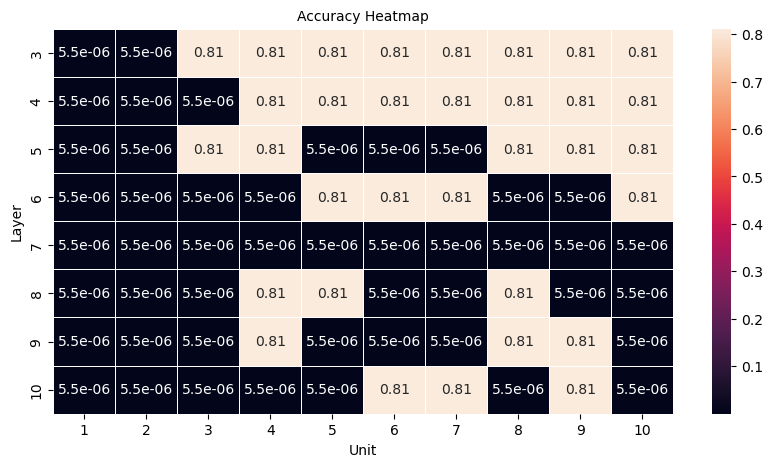

In [289]:
xlabels = range(1, max_range_unit)
ylabels = range(3, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

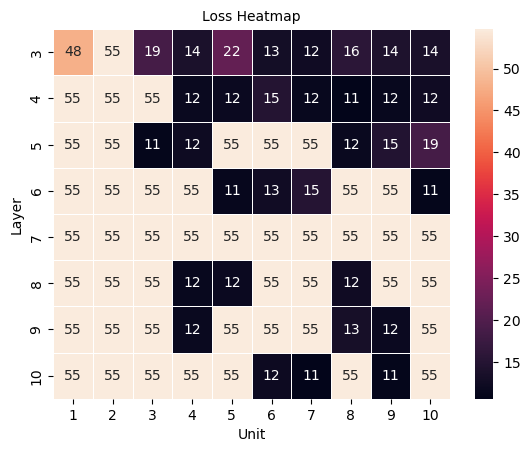

In [290]:
ax = sns.heatmap(loss_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

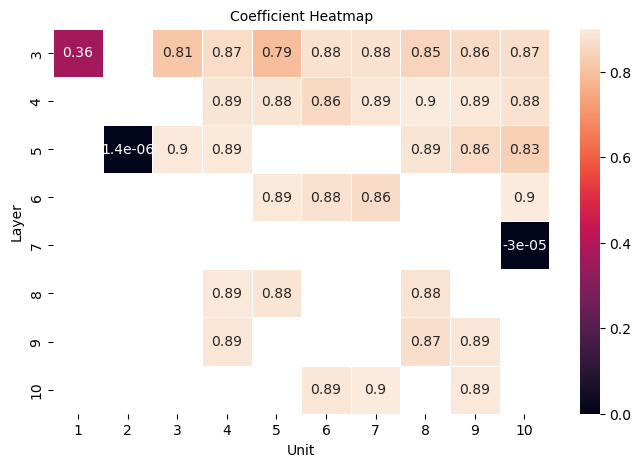

In [291]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

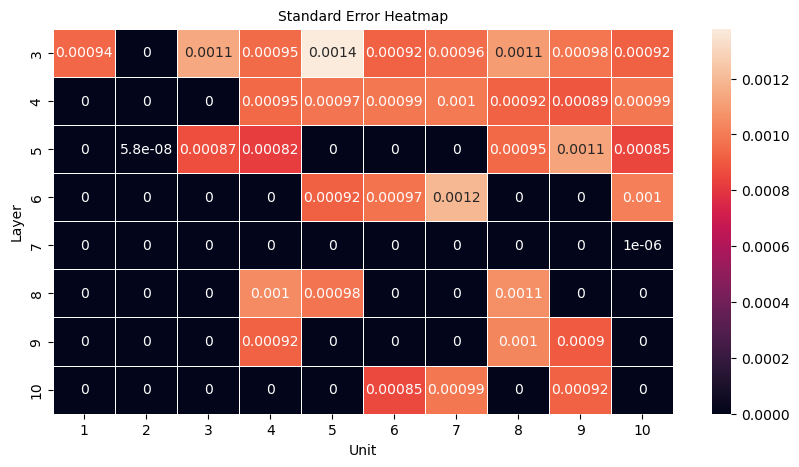

In [292]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [383]:
max_range_layer = 11
max_range_unit = 11
size_arr2 = []
for i in range(3, max_range_layer):
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        print(units)
        size_unit.append(units)
    
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
[1, 1, 1]
##### Layer:3 Unit:2 #####
[2, 2, 1]
##### Layer:3 Unit:3 #####
[3, 2, 1]
##### Layer:3 Unit:4 #####
[4, 2, 1]
##### Layer:3 Unit:5 #####
[5, 3, 1]
##### Layer:3 Unit:6 #####
[6, 4, 2]
##### Layer:3 Unit:7 #####
[7, 4, 1]
##### Layer:3 Unit:8 #####
[8, 5, 2]
##### Layer:3 Unit:9 #####
[9, 6, 3]
##### Layer:3 Unit:10 #####
[10, 6, 2]
##### Layer:4 Unit:1 #####
[1, 1, 1, 1]
##### Layer:4 Unit:2 #####
[2, 2, 2, 1]
##### Layer:4 Unit:3 #####
[3, 3, 2, 1]
##### Layer:4 Unit:4 #####
[4, 3, 2, 1]
##### Layer:4 Unit:5 #####
[5, 3, 1, 1]
##### Layer:4 Unit:6 #####
[6, 4, 2, 1]
##### Layer:4 Unit:7 #####
[7, 5, 3, 1]
##### Layer:4 Unit:8 #####
[8, 6, 4, 2]
##### Layer:4 Unit:9 #####
[9, 6, 3, 1]
##### Layer:4 Unit:10 #####
[10, 7, 4, 1]
##### Layer:5 Unit:1 #####
[1, 1, 1, 1, 1]
##### Layer:5 Unit:2 #####
[2, 2, 2, 2, 1]
##### Layer:5 Unit:3 #####
[3, 3, 3, 2, 1]
##### Layer:5 Unit:4 #####
[4, 4, 3, 2, 1]
##### Layer:5 Unit:5 #####
[5, 4, 3, 2, 1]
##### Layer

In [384]:
size_arr2

[[[1, 1, 1],
  [2, 2, 1],
  [3, 2, 1],
  [4, 2, 1],
  [5, 3, 1],
  [6, 4, 2],
  [7, 4, 1],
  [8, 5, 2],
  [9, 6, 3],
  [10, 6, 2]],
 [[1, 1, 1, 1],
  [2, 2, 2, 1],
  [3, 3, 2, 1],
  [4, 3, 2, 1],
  [5, 3, 1, 1],
  [6, 4, 2, 1],
  [7, 5, 3, 1],
  [8, 6, 4, 2],
  [9, 6, 3, 1],
  [10, 7, 4, 1]],
 [[1, 1, 1, 1, 1],
  [2, 2, 2, 2, 1],
  [3, 3, 3, 2, 1],
  [4, 4, 3, 2, 1],
  [5, 4, 3, 2, 1],
  [6, 4, 2, 1, 1],
  [7, 5, 3, 1, 1],
  [8, 6, 4, 2, 1],
  [9, 7, 5, 3, 1],
  [10, 8, 6, 4, 2]],
 [[1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 2, 1],
  [4, 4, 4, 3, 2, 1],
  [5, 5, 4, 3, 2, 1],
  [6, 5, 4, 3, 2, 1],
  [7, 5, 3, 1, 1, 1],
  [8, 6, 4, 2, 1, 1],
  [9, 7, 5, 3, 1, 1],
  [10, 8, 6, 4, 2, 1]],
 [[1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 3, 2, 1],
  [4, 4, 4, 4, 3, 2, 1],
  [5, 5, 5, 4, 3, 2, 1],
  [6, 6, 5, 4, 3, 2, 1],
  [7, 6, 5, 4, 3, 2, 1],
  [8, 6, 4, 2, 1, 1, 1],
  [9, 7, 5, 3, 1, 1, 1],
  [10, 8, 6, 4, 2, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 

## Find out Hyper paramater 

In [19]:
# Use best layer and unit
shape = (len(X_train[0]),)
def create_model(optimizer="adam"):
    model = keras.Sequential()
    model.add(Dense(8, activation='relu', input_shape=shape)) 
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    return model

### Epoch

In [20]:
estimator = KerasRegressor(model=create_model, verbose=1)

In [21]:

# define the grid search parameters
param_grid = {
    'epochs': [50, 100, 200, 300, 500]
}

In [22]:
grid1 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)

In [23]:
grid1_result = grid1.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


2022-11-23 12:19:31.728176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 12:19:31.729104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 12:19:31.729333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/50
Epoch 1/50
13602/13602 [==============================] - 20s 1ms/step - loss: 514.4344 - accuracy: 4.4343e-04
Epoch 2/50
13602/13602 [==============================] - 20s 1ms/step - loss: 404.2704 - accuracy: 5.2155e-04
Epoch 2/100
13602/13602 [==============================] - 20s 1ms/step - loss: 35007.2188 - accuracy: 2.3435e-04
Epoch 2/50
13602/13602 [==============================] - 20s 1ms/step - loss: 34225.9688 - accuracy: 8.5010e-05
Epoch 2/100
 5790/13602 [===========>..................] - ETA: 11s - loss: 203.9257 - accuracy: 8.0959e-040

KeyboardInterrupt: 

In [ ]:
# summarize results
print("Best: %f using %s" % (grid1_result.best_score_, grid1_result.best_params_))
means = grid1_result.cv_results_['mean_test_score']
stds = grid1_result.cv_results_['std_test_score']
params = grid1_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid1_result.cv_results_

### Batch size

In [22]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, mode='max')]

In [27]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128, 256, 512, 1024, 2048]
}

In [28]:
grid2 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid2_result = grid2.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


2022-11-23 12:20:39.935251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 12:20:39.935668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 12:20:39.936946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
6801/6801 [==============================] - 10s 1ms/step - loss: 445.1013 - accuracy: 1.1028e-04
Epoch 2/100
6801/6801 [==============================] - 10s 1ms/step - loss: 34904.0273 - accuracy: 2.0908e-04
Epoch 2/100
13602/13602 [==============================] - 19s 1ms/step - loss: 34596.9922 - accuracy: 2.3665e-04
Epoch 2/100
13602/13602 [==============================] - 19s 1ms/step - loss: 609.7826 - accuracy: 3.9518e-04
Epoch 2/100
6801/6801 [==============================] - 9s 1ms/step - loss: 192.3371 - accuracy: 2.3205e-04
Epoch 3/100
6801/6801 [==============================] - 9s 1ms/step - loss: 34015.3633 - accuracy: 2.4584e-04
Epoch 3/100
6801/6801 [==============================] - 9s 1ms/step - loss: 177.8837 - accuracy: 8.3402e-04
Epoch 4/100
6801/6801 [==============================] - 9s 1ms/step - loss: 33982.1992 - accuracy: 3.4004e-04
Epoch 4/100
13602/13602 [==============================] - 18s 1ms/step - lo

6801/6801 [==============================] - 9s 1ms/step - loss: 33959.0234 - accuracy: 4.6641e-04
Epoch 49/100
6801/6801 [==============================] - 9s 1ms/step - loss: 140.4800 - accuracy: 7.3522e-05
Epoch 50/100
6801/6801 [==============================] - 9s 1ms/step - loss: 33949.4375 - accuracy: 3.5612e-04
Epoch 50/100
13602/13602 [==============================] - 18s 1ms/step - loss: 33936.2539 - accuracy: 1.6313e-04
Epoch 26/100
13602/13602 [==============================] - 18s 1ms/step - loss: 147.0043 - accuracy: 2.7571e-05
Epoch 26/100
6801/6801 [==============================] - 9s 1ms/step - loss: 140.6452 - accuracy: 9.6498e-05
Epoch 51/100
6801/6801 [==============================] - 9s 1ms/step - loss: 33942.6875 - accuracy: 4.6870e-04
Epoch 51/100
6801/6801 [==============================] - 9s 1ms/step - loss: 139.8199 - accuracy: 6.4332e-05
Epoch 52/100
6801/6801 [==============================] - 9s 1ms/step - loss: 33943.1992 - accuracy: 4.9857e-04
Epoch 5

6801/6801 [==============================] - 10s 1ms/step - loss: 33957.5781 - accuracy: 3.7450e-04
Epoch 96/100
13602/13602 [==============================] - 19s 1ms/step - loss: 142.1368 - accuracy: 2.7571e-05
Epoch 49/100
13602/13602 [==============================] - 19s 1ms/step - loss: 33949.7656 - accuracy: 3.8599e-04
Epoch 49/100
6801/6801 [==============================] - 10s 1ms/step - loss: 138.8806 - accuracy: 2.5273e-05
Epoch 97/100
6801/6801 [==============================] - 9s 1ms/step - loss: 33927.3555 - accuracy: 7.8117e-05
Epoch 97/100
6801/6801 [==============================] - 10s 1ms/step - loss: 139.6670 - accuracy: 2.5273e-05
Epoch 98/100
6801/6801 [==============================] - 11s 2ms/step - loss: 33954.5742 - accuracy: 1.1718e-0467.5117 - accuracy: 6.5226e-y: 6.3119e-s - loss: 37757.8594 - accuracy: 6.1287e-==============>...........] - ETA: 7s - loss: 34674.7227 - accuracy: 4.2083e-.....] - ETA: 6s - loss: 146.9523 - accuracy: 4.0765e-===============

13602/13602 [==============================] - 18s 1ms/step - loss: 141.8707 - accuracy: 2.7571e-05
Epoch 64/100
13602/13602 [==============================] - 18s 1ms/step - loss: 33937.0078 - accuracy: 3.0558e-04
Epoch 64/100
3401/3401 [==============================] - 4s 1ms/step - loss: 141.9130 - accuracy: 2.7571e-05
Epoch 46/100
3401/3401 [==============================] - 4s 1ms/step - loss: 33943.2852 - accuracy: 3.4923e-04
Epoch 48/100
3401/3401 [==============================] - 5s 1ms/step - loss: 141.0526 - accuracy: 2.7571e-05
Epoch 47/100
3401/3401 [==============================] - 5s 1ms/step - loss: 33947.6719 - accuracy: 2.6882e-04
Epoch 49/100
3401/3401 [==============================] - 5s 1ms/step - loss: 140.7416 - accuracy: 2.7571e-05
Epoch 48/100
3401/3401 [==============================] - 5s 1ms/step - loss: 33940.0508 - accuracy: 9.4200e-05
Epoch 50/100
3401/3401 [==============================] - 5s 1ms/step - loss: 141.3727 - accuracy: 2.7571e-05
Epoch 49/

3401/3401 [==============================] - 8s 2ms/step - loss: 33942.6797 - accuracy: 2.5044e-04 ETA: 27s - loss: 38769.3398 - accuracy: 2.8965e-0
Epoch 80/100
3401/3401 [==============================] - 9s 3ms/step - loss: 139.2457 - accuracy: 2.7571e-05008 - accuracy: 2.4867e-........................] - ETA: 11s - loss: 73267.5078 - accu[=============>................] - ETA: 5s - loss: 57098.3203 - accuracy: 9.1969e-.........] - ETA: 3s - loss: 140.2693 - accuracy: 3.4232e007/13602 [=======>......................] - ETA: 25s - loss: 20808.4902 - accuracy: 2.1057e-0: 43461.3945 - accuracy: 9.8110e-0- accuracy: 3.4021e-...] - ETA: 23s - loss: 18803.3008 - accuracy: 2.2432e-1 [======================>.......] - ETA: 2s - loss: 36836.2734 - accuracy: 9.8065===>..] - ETA: 0s - loss: 133.5129 - accuracy: 2.9115
Epoch 79/100
3401/3401 [==============================] - 9s 3ms/step - loss: 33938.0312 - accuracy: 9.8796e-05
Epoch 81/100
3401/3401 [==============================] - 8s 2ms/s

 7

13602/13602 [==============================] - 33s 2ms/step - loss: 33943.6211 - accuracy: 2.5963e-04
Epoch 76/100
3401/3401 [==============================] - 8s 2ms/step - loss: 33960.9688 - accuracy: 1.4704e-04
Epoch 96/100
3401/3401 [==============================] - 8s 2ms/step - loss: 139.0652 - accuracy: 2.9868e-05
Epoch 94/100
3401/3401 [==============================] - 8s 2ms/step - loss: 140.9629 - accuracy: 2.7571e-05
Epoch 95/100
3401/3401 [==============================] - 9s 3ms/step - loss: 33937.5586 - accuracy: 2.3895e-04==============>...............] - ETA: 16s - loss: 54035.1992 - accuracy: 2.727
Epoch 98/100
3401/3401 [==============================] - 9s 3ms/step - loss: 139.5006 - accuracy: 2.7571e-05
Epoch 96/100
13602/13602 [==============================] - 33s 2ms/step - loss: 141.7959 - accuracy: 2.9868e-05s - loss: 148.2344 - accuracy: 2.4002eacy: 2.090[=========================>....] - ETA: 4s - loss: 37931.6055 - accuracy: 3.1355e====================>.] 

1701/1701 [==============================] - 5s 3ms/step - loss: 33941.3320 - accuracy: 8.2713e-05
Epoch 15/100
13602/13602 [==============================] - 33s 2ms/step - loss: 141.7936 - accuracy: 2.9868e-05.....................] - ETA: 3s - loss: 362757.5625 - accuracy: 7.8125e-
Epoch 80/100
1701/1701 [==============================] - 5s 3ms/step - loss: 205.9344 - accuracy: 8.1104e-04
Epoch 8/100
13602/13602 [==============================] - 33s 2ms/step - loss: 33950.0039 - accuracy: 4.1816e-04............] - ETA: 29s - loss: 142.3989 - accuracy: 4.3493e-
Epoch 80/100
1701/1701 [==============================] - 4s 2ms/step - loss: 201.1084 - accuracy: 8.2483e-04.....] - ETA: 28s - loss: 146.3114 - accuracy: 3.3512e-
Epoch 9/100
1701/1701 [==============================] - ETA: 0s - loss: 188.0167 - accuracy: 7.9414e-237e-06/13602 [==>...........................] - ETA: 29s - loss: 1346.6256 - accuracy: 5.348 - 4s 3ms/step - loss: 187.7837 - accuracy: 7.9496e-04
Epoch 10/100
1

1701/1701 [==============================] - 5s 3ms/step - loss: 142.8162 - accuracy: 4.8249e-05loss: 134.7643 - accuracy: 4.8043e-0 35575.5859 - accuracy: 6.5590e-016 - accuracy: 2.9397e-..] - ETA: 2s - loss: 25807.2773 - accuracy: 6.2500e
Epoch 44/100
1701/1701 [==============================] - 5s 3ms/step - loss: 33951.5312 - accuracy: 4.8249e-05
Epoch 52/100
1701/1701 [==============================] - 4s 2ms/step - loss: 142.4937 - accuracy: 3.9059e-05- loss: 27561.5996 - accuracy: 2.7788e-
Epoch 45/100
1701/1701 [==============================] - 4s 2ms/step - loss: 33942.6406 - accuracy: 5.7439e-05
Epoch 53/100
1701/1701 [==============================] - 4s 2ms/step - loss: 143.4535 - accuracy: 4.3654e-05
Epoch 46/100
1701/1701 [==============================] - 4s 2ms/step - loss: 33951.4609 - accuracy: 1.8151e-04
Epoch 54/100
1701/1701 [==============================] - 4s 2ms/step - loss: 142.6034 - accuracy: 4.3654e-05>..................] - ETA: 2s - loss: 152.6157 - accur

1701/1701 [==============================] - 2s 1ms/step - loss: 33927.1523 - accuracy: 1.3096e-04
Epoch 78/100
13602/13602 [==============================] - 18s 1ms/step - loss: 141.8114 - accuracy: 2.7571e-05
Epoch 88/100
1701/1701 [==============================] - 2s 1ms/step - loss: 142.0834 - accuracy: 3.6761e-05
Epoch 71/100
1701/1701 [==============================] - 2s 1ms/step - loss: 33929.2969 - accuracy: 3.4464e-05
Epoch 79/100
13602/13602 [==============================] - 18s 1ms/step - loss: 33924.1836 - accuracy: 2.7801e-04
Epoch 88/100
1701/1701 [==============================] - 2s 1ms/step - loss: 142.4642 - accuracy: 4.1356e-05
Epoch 72/100
1701/1701 [==============================] - 2s 1ms/step - loss: 33944.9844 - accuracy: 2.9868e-05
Epoch 80/100
1701/1701 [==============================] - 2s 1ms/step - loss: 142.8040 - accuracy: 4.8249e-05
Epoch 73/100
1701/1701 [==============================] - 2s 1ms/step - loss: 33965.7969 - accuracy: 3.4464e-05
Epoch 8

851/851 [==============================] - 1s 1ms/step - loss: 141.5215 - accuracy: 7.0765e-04
Epoch 28/100
13602/13602 [==============================] - 22s 2ms/step - loss: 140.7275 - accuracy: 2.7571e-05
Epoch 94/100
851/851 [==============================] - 1s 1ms/step - loss: 33965.4062 - accuracy: 5.0776e-04
Epoch 45/100
851/851 [==============================] - 1s 1ms/step - loss: 140.9753 - accuracy: 7.2833e-04
Epoch 29/100
851/851 [==============================] - 1s 1ms/step - loss: 33966.1094 - accuracy: 4.1356e-04
Epoch 46/100
851/851 [==============================] - 1s 1ms/step - loss: 33962.6758 - accuracy: 4.9168e-04
Epoch 47/100
13602/13602 [==============================] - 22s 2ms/step - loss: 33964.3633 - accuracy: 2.1827e-04
Epoch 94/100
851/851 [==============================] - 1s 1ms/step - loss: 140.3885 - accuracy: 6.5940e-04
Epoch 31/100
851/851 [==============================] - 1s 1ms/step - loss: 33959.9336 - accuracy: 4.5722e-04
Epoch 48/100
851/851 

851/851 [==============================] - 1s 1ms/step - loss: 138.8583 - accuracy: 6.4332e-040
Epoch 61/100
851/851 [==============================] - 1s 2ms/step - loss: 33928.9219 - accuracy: 4.6641e-04
Epoch 78/100
851/851 [==============================] - 1s 2ms/step - loss: 139.0598 - accuracy: 6.4332e-040
Epoch 62/100
13602/13602 [==============================] - 19s 1ms/step - loss: 33954.7227 - accuracy: 2.7111e-04
Epoch 96/100
851/851 [==============================] - 2s 2ms/step - loss: 33945.9297 - accuracy: 2.8260e-04
Epoch 79/100
851/851 [==============================] - 1s 2ms/step - loss: 138.4693 - accuracy: 6.9616e-04................] - ETA: 21s - loss: 492.4712 - accuracy: 2.0000e-
Epoch 63/100
851/851 [==============================] - 1s 2ms/step - loss: 33947.5000 - accuracy: 3.2396e-04
Epoch 80/100
851/851 [==============================] - 1s 2ms/step - loss: 138.4358 - accuracy: 6.9157e-04
Epoch 64/100
851/851 [==============================] - 1s 2ms/step 

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


13602/13602 [==============================] - 15s 1ms/step - loss: 141.3738 - accuracy: 2.7571e-05
Epoch 99/100
13602/13602 [==============================] - 15s 1ms/step - loss: 33956.2070 - accuracy: 3.0328e-04
Epoch 99/100
10395/13602 [=====================>........] - ETA: 3s - loss: 37009.7305 - accuracy: 1.8038e-04Epoch 1/100
Epoch 1/100


2022-11-23 12:55:07.126082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 12:55:07.126082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


13602/13602 [==============================] - 14s 1ms/step - loss: 141.3706 - accuracy: 2.7571e-05
Epoch 100/100
426/426 [==============================] - 1s 2ms/step - loss: 41050.5977 - accuracy: 3.6531e-04
Epoch 2/100
426/426 [==============================] - 1s 2ms/step - loss: 57879.6172 - accuracy: 5.3074e-04
Epoch 2/100
426/426 [==============================] - 1s 1ms/step - loss: 34354.3672 - accuracy: 2.6192e-04
Epoch 3/100
426/426 [==============================] - 1s 1ms/step - loss: 34206.6836 - accuracy: 1.5164e-04
Epoch 4/100
426/426 [==============================] - 1s 1ms/step - loss: 398.2717 - accuracy: 1.7232e-0404
Epoch 4/100
426/426 [==============================] - 1s 1ms/step - loss: 341.1458 - accuracy: 2.3665e-04
Epoch 5/100
426/426 [==============================] - 1s 1ms/step - loss: 309.1503 - accuracy: 3.4464e-04
Epoch 6/100
426/426 [==============================] - 1s 1ms/step - loss: 34075.7969 - accuracy: 3.6761e-05
Epoch 6/100
426/426 [=========

426/426 [==============================] - 0s 1ms/step - loss: 33959.5898 - accuracy: 5.2385e-04
Epoch 71/100
426/426 [==============================] - 0s 1ms/step - loss: 145.0329 - accuracy: 8.6848e-04
Epoch 72/100
426/426 [==============================] - 0s 1ms/step - loss: 33955.9375 - accuracy: 4.9628e-04
Epoch 72/100
426/426 [==============================] - 0s 1ms/step - loss: 144.8794 - accuracy: 8.7537e-04
Epoch 73/100
426/426 [==============================] - 0s 1ms/step - loss: 33947.6797 - accuracy: 4.6870e-04
Epoch 73/100
426/426 [==============================] - 0s 1ms/step - loss: 144.3490 - accuracy: 8.5929e-04
Epoch 74/100
426/426 [==============================] - 0s 1ms/step - loss: 33964.1094 - accuracy: 4.2275e-04
Epoch 74/100
426/426 [==============================] - 0s 1ms/step - loss: 144.6888 - accuracy: 8.6848e-04
Epoch 75/100
426/426 [==============================] - 0s 1ms/step - loss: 33964.4766 - accuracy: 4.7560e-04
Epoch 75/100
426/426 [=========

213/213 [==============================] - 0s 1ms/step - loss: 34007.4531 - accuracy: 4.3654e-053.5263 - accuracy: 9.5274e-
Epoch 8/100
213/213 [==============================] - 0s 1ms/step - loss: 407.2872 - accuracy: 7.8117e-05
Epoch 6/100
213/213 [==============================] - 0s 1ms/step - loss: 34003.7188 - accuracy: 3.6761e-05
Epoch 9/100
213/213 [==============================] - 0s 1ms/step - loss: 364.4680 - accuracy: 7.5820e-05
Epoch 7/100
213/213 [==============================] - 0s 1ms/step - loss: 33997.9570 - accuracy: 3.4464e-05
Epoch 10/100
213/213 [==============================] - 0s 1ms/step - loss: 333.2219 - accuracy: 7.1225e-05
Epoch 8/100
213/213 [==============================] - 0s 1ms/step - loss: 33996.0430 - accuracy: 3.2166e-05
Epoch 11/100
213/213 [==============================] - 0s 1ms/step - loss: 308.5796 - accuracy: 6.2034e-05
Epoch 9/100
213/213 [==============================] - 0s 1ms/step - loss: 33991.2461 - accuracy: 2.9868e-05
Epoch 12/1

213/213 [==============================] - 0s 1ms/step - loss: 182.2508 - accuracy: 8.4091e-04
Epoch 42/100
213/213 [==============================] - 0s 1ms/step - loss: 33944.5859 - accuracy: 5.7439e-05
Epoch 45/100
213/213 [==============================] - 0s 1ms/step - loss: 180.0033 - accuracy: 8.5010e-04
Epoch 43/100
213/213 [==============================] - 0s 1ms/step - loss: 33939.5586 - accuracy: 4.8249e-05
Epoch 46/100
213/213 [==============================] - 0s 1ms/step - loss: 178.7707 - accuracy: 8.6389e-04
Epoch 44/100
213/213 [==============================] - 0s 1ms/step - loss: 33941.7266 - accuracy: 1.1488e-04
Epoch 47/100
213/213 [==============================] - 0s 1ms/step - loss: 178.3965 - accuracy: 8.7078e-04
Epoch 45/100
213/213 [==============================] - 0s 1ms/step - loss: 33936.1875 - accuracy: 2.0908e-04
Epoch 48/100
213/213 [==============================] - 0s 1ms/step - loss: 176.8361 - accuracy: 8.3172e-04
Epoch 46/100
213/213 [===========

2022-11-23 12:56:35.030842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1701/1701 [==============================] - 2s 907us/step - loss: 17546.4707 - accuracy: 2.2286e-04
Epoch 2/100
1701/1701 [==============================] - 1s 871us/step - loss: 17141.9102 - accuracy: 1.0569e-04
Epoch 3/100
1701/1701 [==============================] - 1s 872us/step - loss: 17118.0840 - accuracy: 2.9064e-04
Epoch 4/100
1701/1701 [==============================] - 1s 869us/step - loss: 17110.9062 - accuracy: 5.6405e-04
Epoch 5/100
1701/1701 [==============================] - 1s 873us/step - loss: 17102.0000 - accuracy: 6.7434e-04
Epoch 6/100
1701/1701 [==============================] - 1s 873us/step - loss: 17088.0625 - accuracy: 6.8353e-04
Epoch 7/100
1701/1701 [==============================] - 1s 872us/step - loss: 17087.8066 - accuracy: 6.8468e-04
Epoch 8/100
1701/1701 [==============================] - 1s 871us/step - loss: 17092.6523 - accuracy: 4.8249e-04
Epoch 9/100
1701/1701 [==============================] - 1s 880us/step - loss: 17098.1621 - accuracy: 6.4332

1701/1701 [==============================] - 1s 876us/step - loss: 17081.5801 - accuracy: 4.6296e-04
Epoch 74/100
1701/1701 [==============================] - 1s 873us/step - loss: 17097.1953 - accuracy: 3.8140e-04
Epoch 75/100
1701/1701 [==============================] - 1s 878us/step - loss: 17064.4922 - accuracy: 5.4452e-04
Epoch 76/100
1701/1701 [==============================] - 2s 881us/step - loss: 17079.7012 - accuracy: 2.9064e-04
Epoch 77/100
1701/1701 [==============================] - 1s 875us/step - loss: 17093.5273 - accuracy: 3.2855e-04
Epoch 78/100
1701/1701 [==============================] - 1s 870us/step - loss: 17091.6523 - accuracy: 5.5027e-04
Epoch 79/100
1701/1701 [==============================] - 1s 876us/step - loss: 17059.0332 - accuracy: 4.1012e-04
Epoch 80/100
1701/1701 [==============================] - 1s 873us/step - loss: 17093.7266 - accuracy: 2.3320e-04
Epoch 81/100
1701/1701 [==============================] - 1s 872us/step - loss: 17062.6973 - accuracy

In [29]:
# summarize results
print("Best: %f using %s" % (grid2_result.best_score_, grid2_result.best_params_))
means = grid2_result.cv_results_['mean_test_score']
stds = grid2_result.cv_results_['std_test_score']
params = grid2_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.192782 using {'batch_size': 512}
0.037559 (0.036268) with: {'batch_size': 32}
0.139759 (0.138745) with: {'batch_size': 64}
0.081904 (0.081011) with: {'batch_size': 128}
0.043205 (0.042123) with: {'batch_size': 256}
0.192782 (0.191176) with: {'batch_size': 512}
0.010855 (0.010020) with: {'batch_size': 1024}
0.035418 (0.034716) with: {'batch_size': 2048}


In [30]:
grid2_result.cv_results_

{'mean_fit_time': array([2106.5677768 ,  913.14046478,  613.94265592,  345.10681236,
         132.91743195,   54.03935838,   29.07555842]),
 'std_fit_time': array([16.00944507,  2.02354789,  8.61411202,  3.88679349,  9.63139498,
         0.1886735 ,  0.33461857]),
 'mean_score_time': array([18.96274853, 10.45415616, 10.39946806,  2.69028473,  1.17734814,
         0.5659219 ,  0.31980264]),
 'std_score_time': array([1.69474554e+00, 3.35118771e-02, 4.85461950e-02, 1.09052658e-03,
        2.22408772e-02, 1.03210211e-02, 3.19515467e-02]),
 'param_batch_size': masked_array(data=[32, 64, 128, 256, 512, 1024, 2048],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32},
  {'batch_size': 64},
  {'batch_size': 128},
  {'batch_size': 256},
  {'batch_size': 512},
  {'batch_size': 1024},
  {'batch_size': 2048}],
 'split0_test_score': array([0.07382631, 0.27850402, 0.16291516, 0.0853285 , 0.38395759,


### Optimizer

In [65]:
# define the grid search parameters
param_grid = {
     'optimizer':['Adam', 'Adadelta', 'Adamax', 'RMSprop',  'SGD'],
}

In [66]:
grid3 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid3_result = grid3.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


2022-11-02 11:39:42.666236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 11:39:42.672226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 11:39:42.676453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2022-11-02 11:39:42.677431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14080/14080 [==============================] - 24s 2ms/step - loss: 38.0566 - accuracy: 0.0967======>................] - ETA: 12s - loss: 41.1334 - accuracy: 0.27==>...............] - ETA: 11s - loss: 125.8350 - accuracy: 0.........] - ETA: 11s - loss: 60.1728 - accuracy: loss: 112.1745 - accuracy: 0.2478/14080 [=================>............] - ETA: 9s - loss: 38.4775 - accuracy: 0.392- loss: 109.2700 - accuracy: 0.23939/14080 [==================>...........] - ETA: 8s - loss: 45.6252 - accuracy: 0.07 0.229=>..........] - ETA: 7s - loss: 44.6762 - accuracy: 0.0ss: 42.1854 - accuracy: 0.064===================>.......] - ETA: 5s - loss: 35.2307 - accuracy: 0.4=>......] - ETA: 4s - loss: 93.6382 - accuracy: 0.18 - loss: 91.8920 - accuracy: 0.185==============>...] - ETA: 2s - loss: 86.0209 - accuracy: 0.1686
Epoch 2/100
14080/14080 [==============================] - 25s 2ms/step - loss: 81.3385 - accuracy: 0.1538
Epoch 2/100
14080/14080 [==============================] - 25s 2ms/step - l

 2629/14080 [====>.........................] - ETA: 18s - loss: 13.5634 - accuracy: 0.8106

14080/14080 [==============================] - 23s 2ms/step - loss: 13.8207 - accuracy: 0.8114......] - ETA: 17s - loss: 13.0979 - accuracy: 0.8loss: 12.8800 - accuracy: 0..................] - ETA: 13s - loss: 13.1422 - accuracy: 04 - accuracy====================>........] - ETA: 5s - loss: 12.6912 - accuracy: 0.8 [===========================>..] - ETA: 1s - loss: 13.9901 - accuracy: 0.81
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 12.0188 - accuracy: 0.8110=======================>..] - ETA: 1s - loss: 11.7865 - accuracy: 0.798 11.6705 - accuracy: 0.79
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.6548 - accuracy: 0.7991
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.8737 - accuracy: 0.8110
Epoch 10/100
14080/14080 [==============================] - 24s 2ms/step - loss: 14.2695 - accuracy: 0.8102>..........................] - ETA: 19s - loss: 12.7130 - accuracy: 0.81- loss: 1

14080/14080 [==============================] - 26s 2ms/step - loss: 11.2311 - accuracy: 0.8110.................] - ETA: 23s - loss: 10.4483 - accuracy: 0.813
Epoch 28/100
14080/14080 [==============================] - 26s 2ms/step - loss: 11.2647 - accuracy: 0.8110
Epoch 28/100
14080/14080 [==============================] - 26s 2ms/step - loss: 12.7558 - accuracy: 0.8035
Epoch 28/100
14080/14080 [==============================] - 27s 2ms/step - loss: 12.2924 - accuracy: 0.8109A: 24s - loss: 10.8945 - accura............] - ETA: 18s - loss: 10.1530 - accuracy: 0.080 [======>.......................] - ETA: 22s - loss: 10.7316 - accuracy: 0.uracy: 0.775 [========>.....................] - ETA: 20s - loss: 9.4253 - accuracy: 0.81.] - ETA: 19s - loss: 13.3135 - accuracy: 0.............] - ETA: 14s - loss: 11.9745 - accuracy: 0.8.810==>...............] - ETA: 14s - loss: 9.8201 - accuracy: 0.810012 - accuracy: 0.813/14080 [====================>.........] - ETA: 8s - loss: 12.1740 - accuracy: 0

14080/14080 [==============================] - 20s 1ms/step - loss: 11.0336 - accuracy: 0.8110
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0480 - accuracy: 0.8100
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8805 - accuracy: 0.8088
Epoch 54/100
14080/14080 [==============================] - 19s 1ms/step - loss: 12.6761 - accuracy: 0.8035
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9266 - accuracy: 0.8110
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8996 - accuracy: 0.8110
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.7877 - accuracy: 0.8097
Epoch 55/100
14080/14080 [==============================] - 18s 1ms/step - loss: 12.2481 - accuracy: 0.8115
Epoch 56/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.8456 - accuracy: 0.8110
Epoch 56/100
14080/14080 [===============

14080/14080 [==============================] - 18s 1ms/step - loss: 11.4267 - accuracy: 0.8083
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7961 - accuracy: 0.8093
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.8062 - accuracy: 0.8110
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.9188 - accuracy: 0.8086
Epoch 73/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.9101 - accuracy: 0.8104
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8088 - accuracy: 0.8107
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7490 - accuracy: 0.8110
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7863 - accuracy: 0.8087
Epoch 74/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.1730 - accuracy: 0.8115
Epoch 75/100
14080/14080 [===============

  680/14080 [>.............................] - ETA: 18s - loss: 4.7120 - accuracy: 0.8106

14080/14080 [==============================] - 20s 1ms/step - loss: 11.3952 - accuracy: 0.8098
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6519 - accuracy: 0.8110
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6605 - accuracy: 0.8089
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8967 - accuracy: 0.8110
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.2268 - accuracy: 0.8098
Epoch 92/100
14080/14080 [==============================] - 21s 2ms/step - loss: 10.7620 - accuracy: 0.8110
Epoch 92/100
14080/14080 [==============================] - 21s 2ms/step - loss: 10.6733 - accuracy: 0.8097
Epoch 92/100
14080/14080 [==============================] - 22s 2ms/step - loss: 12.9816 - accuracy: 0.8110
Epoch 93/100
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6460 - accuracy: 0.8110
Epoch 93/100
14080/14080 [===============

14080/14080 [==============================] - 18s 1ms/step - loss: 13.0438 - accuracy: 0.8115
Epoch 24/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.6141 - accuracy: 0.8114
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.4970 - accuracy: 0.8109
Epoch 24/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.0330 - accuracy: 0.8074
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 15.0187 - accuracy: 0.8078
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.5786 - accuracy: 0.8112
Epoch 26/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.3020 - accuracy: 0.8093
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.4821 - accuracy: 0.8089
Epoch 26/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.6577 - accuracy: 0.8110
Epoch 26/100
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 10.5261 - accuracy: 0.8110
Epoch 59/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.9031 - accuracy: 0.8081
Epoch 60/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4265 - accuracy: 0.8110
Epoch 59/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7933 - accuracy: 0.8110
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.6320 - accuracy: 0.8110
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.6521 - accuracy: 0.8094
Epoch 61/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.9472 - accuracy: 0.8104
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7722 - accuracy: 0.8110
Epoch 61/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.6663 - accuracy: 0.8110
Epoch 61/100
14080/14080 [===============

14080/14080 [==============================] - 19s 1ms/step - loss: 10.8470 - accuracy: 0.8115=====>....................] - ETA: 12s - loss: 10.3420 - accuracy: 0.8
Epoch 94/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.5862 - accuracy: 0.8110
Epoch 95/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.5176 - accuracy: 0.8101
Epoch 95/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9316 - accuracy: 0.8033
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4182 - accuracy: 0.8115
Epoch 95/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6412 - accuracy: 0.8110
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.4717 - accuracy: 0.8095==================>......] - ETA: 3s - loss: 10.5677 - accuracy:
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0932 - accuracy: 0.8033
Epoch 97/100
14

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


11299/14080 [=======================>......] - ETA: 2s

2022-11-02 12:48:26.259205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 12:48:26.259353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11442/14080 [=======================>......] - ETA: 2sEpoch 1/100
Epoch 1/100
14080/14080 [==============================] - 17s 1ms/step - loss: 96.4604 - accuracy: 0.1224
Epoch 2/100
14080/14080 [==============================] - 17s 1ms/step - loss: 191.6371 - accuracy: 0.2681
Epoch 2/100
14080/14080 [==============================] - 16s 1ms/step - loss: 28.1517 - accuracy: 0.1022
Epoch 3/100
14080/14080 [==============================] - 16s 1ms/step - loss: 28.1222 - accuracy: 0.7539
Epoch 3/100
14080/14080 [==============================] - 14s 992us/step - loss: 17.3636 - accuracy: 0.8111
Epoch 4/100
14080/14080 [==============================] - 14s 994us/step - loss: 24.3844 - accuracy: 0.8116
Epoch 4/100
14080/14080 [==============================] - 14s 976us/step - loss: 15.0158 - accuracy: 0.8111
Epoch 5/100
14080/14080 [==============================] - 14s 978us/step - loss: 20.4140 - accuracy: 0.8115
Epoch 5/100
14080/14080 [==============================] - 14s 1ms/st

14080/14080 [==============================] - 14s 995us/step - loss: 10.6738 - accuracy: 0.8110
Epoch 74/100
14080/14080 [==============================] - 16s 1ms/step - loss: 11.3725 - accuracy: 0.8095
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7779 - accuracy: 0.8110
Epoch 75/100
14080/14080 [==============================] - 17s 1ms/step - loss: 11.2908 - accuracy: 0.8106
Epoch 75/100
14080/14080 [==============================] - 14s 1ms/step - loss: 10.7291 - accuracy: 0.8110
Epoch 76/100
14080/14080 [==============================] - 14s 1ms/step - loss: 11.3294 - accuracy: 0.8081
Epoch 76/100
14080/14080 [==============================] - 14s 998us/step - loss: 10.6760 - accuracy: 0.8110
Epoch 77/100
14080/14080 [==============================] - 14s 1ms/step - loss: 11.2205 - accuracy: 0.8100
Epoch 77/100
14080/14080 [==============================] - 15s 1ms/step - loss: 10.8275 - accuracy: 0.8110
Epoch 78/100
14080/14080 [===========

28160/28160 [==============================] - 23s 833us/step - loss: 10.8272 - accuracy: 0.7793
Epoch 93/100
28160/28160 [==============================] - 23s 822us/step - loss: 10.9115 - accuracy: 0.7712
Epoch 94/100
28160/28160 [==============================] - 23s 821us/step - loss: 10.9022 - accuracy: 0.7781
Epoch 95/100
28160/28160 [==============================] - 23s 823us/step - loss: 10.8916 - accuracy: 0.7814
Epoch 96/100
28160/28160 [==============================] - 23s 823us/step - loss: 10.9607 - accuracy: 0.7826
Epoch 97/100
28160/28160 [==============================] - 23s 826us/step - loss: 10.8653 - accuracy: 0.7982
Epoch 98/100
28160/28160 [==============================] - 36s 1ms/step - loss: 10.8538 - accuracy: 0.7984
Epoch 99/100
28160/28160 [==============================] - 44s 2ms/step - loss: 10.9121 - accuracy: 0.7831
Epoch 100/100
28160/28160 [==============================] - 43s 2ms/step - loss: 10.9758 - accuracy: 0.7676


In [67]:
# summarize results
print("Best: %f using %s" % (grid3_result.best_score_, grid3_result.best_params_))
means = grid3_result.cv_results_['mean_test_score']
stds = grid3_result.cv_results_['std_test_score']
params = grid3_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811007 using {'optimizer': 'Adamax'}
0.783556 (0.003804) with: {'optimizer': 'Adam'}
0.785475 (0.021187) with: {'optimizer': 'Adadelta'}
0.811007 (0.006864) with: {'optimizer': 'Adamax'}
0.704559 (0.083618) with: {'optimizer': 'RMSprop'}
0.787366 (0.031326) with: {'optimizer': 'SGD'}


In [68]:
grid3_result.cv_results_

{'mean_fit_time': array([2141.48379099, 2147.84685791, 1919.02493095, 1898.62155139,
        1518.62872076]),
 'std_fit_time': array([ 5.16962993,  0.31923306, 23.69362903,  6.66083539,  2.60736942]),
 'mean_score_time': array([20.61306047, 18.04743218, 17.9823066 , 14.61605763, 15.88364732]),
 'std_score_time': array([0.00678444, 2.59823298, 2.56798661, 0.35610247, 0.99980056]),
 'param_optimizer': masked_array(data=['Adam', 'Adadelta', 'Adamax', 'RMSprop', 'SGD'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'Adam'},
  {'optimizer': 'Adadelta'},
  {'optimizer': 'Adamax'},
  {'optimizer': 'RMSprop'},
  {'optimizer': 'SGD'}],
 'split0_test_score': array([0.78735941, 0.7642879 , 0.81787049, 0.62094079, 0.81869233]),
 'split1_test_score': array([0.77975238, 0.80666274, 0.80414264, 0.78817727, 0.75603976]),
 'mean_test_score': array([0.78355589, 0.78547532, 0.81100657, 0.70455903, 0.78736604]),
 'std_

# Check optimizer by correlation

In [75]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(694168, 5)
(694168,)
(27092, 5)
(27092,)


In [77]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, mode='max')]

In [82]:
def create_nn_corr(bsize, opt, epoch, isCallback=False):
    model = keras.Sequential()
    # Change here for best layers and units
    model.add(Dense(4, activation='relu', input_shape=(len(X_train[0]),)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    if isCallback:
        model.fit(X_train, y_train, batch_size=bsize, epochs=epoch, callbacks=myCallbacks)
    else:
        model.fit(X_train, y_train, batch_size=bsize, epochs=epoch)
        
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

## Batch size

In [84]:
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
batch_size = [32, 64, 128, 256, 512, 1024, 2048, 10000]
for i in range(len(batch_size)):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    print("##### Batch:"+str(batch_size[i])+" #####")
    acc, loss, coef, err = create_nn_corr(batch_size[i], 'adam', 100, True)
    acc_unit.append(acc)
    loss_unit.append(loss)
    coef_unit.append(coef)
    err_unit.append(err)

    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Batch:32 #####
Epoch 1/100
21693/21693 [==============================] - 24s 1ms/step - loss: 62.9719 - accuracy: 3.3853e-04
Epoch 2/100
21693/21693 [==============================] - 25s 1ms/step - loss: 33.5662 - accuracy: 0.0014
Epoch 3/100
21693/21693 [==============================] - 26s 1ms/step - loss: 29.0006 - accuracy: 7.1741e-04
Epoch 4/100
21693/21693 [==============================] - 22s 1ms/step - loss: 28.1549 - accuracy: 6.7707e-04
Epoch 5/100
21693/21693 [==============================] - 24s 1ms/step - loss: 27.7723 - accuracy: 6.5834e-04
Epoch 6/100
21693/21693 [==============================] - 26s 1ms/step - loss: 27.4622 - accuracy: 6.9292e-04
Epoch 7/100
21693/21693 [==============================] - 25s 1ms/step - loss: 27.0106 - accuracy: 5.5750e-04
Epoch 8/100
21693/21693 [==============================] - 21s 978us/step - loss: 26.6006 - accuracy: 5.1140e-04
Epoch 9/100
21693/21693 [==============================] - 23s 1ms/step - loss: 26.7829 - acc

678/678 [==============================] - 1s 1ms/step - loss: 73.5452 - accuracy: 0.0012
Epoch 7/100
678/678 [==============================] - 1s 1ms/step - loss: 72.8288 - accuracy: 0.0013
Epoch 8/100
678/678 [==============================] - 1s 1ms/step - loss: 72.6249 - accuracy: 0.0012
Epoch 9/100
678/678 [==============================] - 1s 1ms/step - loss: 72.3780 - accuracy: 0.0012
Epoch 10/100
678/678 [==============================] - 1s 1ms/step - loss: 72.1431 - accuracy: 0.0011
Epoch 11/100
678/678 [==============================] - 1s 1ms/step - loss: 72.0977 - accuracy: 0.0011
Epoch 12/100
678/678 [==============================] - 1s 1ms/step - loss: 71.8972 - accuracy: 9.1044e-04
Epoch 13/100
678/678 [==============================] - 1s 1ms/step - loss: 71.7364 - accuracy: 8.0816e-04
Epoch 14/100
678/678 [==============================] - 1s 1ms/step - loss: 71.1593 - accuracy: 6.7275e-04
Epoch 15/100
847/847 [==============================] - 1s 785us/step - loss:

In [85]:
acc_arr

[[0.0009596928721293807],
 [0.0],
 [0.0012549830134958029],
 [0.00018455632380209863],
 [0.0],
 [0.0017717407317832112],
 [0.0],
 [0.0040971506386995316]]

In [86]:
loss_arr

[[16.24234962463379],
 [18.15580177307129],
 [16.83454132080078],
 [35.728477478027344],
 [35.422245025634766],
 [65.96548461914062],
 [69.57681274414062],
 [215.1533966064453]]

In [87]:
coef_arr

[[0.9220695167523901],
 [0.9200636860562177],
 [0.9191678237458621],
 [0.8762158061094331],
 [0.8670151286521787],
 [0.6654795769939033],
 [0.6355466642077632],
 [0.026817625877629633]]

In [88]:
err_arr

[[0.0020043216862371243],
 [0.001929717560830917],
 [0.002084317308153746],
 [0.001786113412995917],
 [0.0019154678198991845],
 [0.0024578955781167917],
 [0.0021285029611089494],
 [0.00021464026631662608]]

## Optimizer

In [89]:
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
opts = ['Adam', 'Adadelta', 'Adamax', 'RMSprop',  'SGD']
for i in range(len(opts)):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    print("##### Optimizer:"+opts[i]+" #####")
    acc, loss, coef, err =  create_nn_corr(32, opts[i], 100, True)
    acc_unit.append(acc)
    loss_unit.append(loss)
    coef_unit.append(coef)
    err_unit.append(err)

    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Optimizer:Adam #####
Epoch 1/100
21693/21693 [==============================] - 24s 1ms/step - loss: 1956.1924 - accuracy: 5.7911e-04
Epoch 2/100
21693/21693 [==============================] - 23s 1ms/step - loss: 33.8091 - accuracy: 0.0000e+00
Epoch 3/100
21693/21693 [==============================] - 23s 1ms/step - loss: 30.8329 - accuracy: 0.0000e+00
Epoch 4/100
21693/21693 [==============================] - 23s 1ms/step - loss: 28.9814 - accuracy: 0.0000e+00
Epoch 5/100
21693/21693 [==============================] - 22s 1ms/step - loss: 28.2796 - accuracy: 0.0000e+00
Epoch 6/100
21693/21693 [==============================] - 22s 1ms/step - loss: 27.8345 - accuracy: 0.0000e+00
Epoch 7/100
21693/21693 [==============================] - 22s 1ms/step - loss: 28.4403 - accuracy: 0.0000e+00
Epoch 8/100
21693/21693 [==============================] - 21s 987us/step - loss: 28.3831 - accuracy: 0.0000e+00
Epoch 9/100
21693/21693 [==============================] - 23s 1ms/step - loss: 2

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


21693/21693 [==============================] - 19s 860us/step - loss: 386688927999721472.0000 - accuracy: 1.1381e-04
Epoch 2/100
21693/21693 [==============================] - 18s 848us/step - loss: 105.2931 - accuracy: 0.0000e+00
Epoch 3/100
21693/21693 [==============================] - 18s 848us/step - loss: 105.2938 - accuracy: 0.0000e+00
Epoch 4/100
21693/21693 [==============================] - 18s 848us/step - loss: 105.2981 - accuracy: 0.0000e+00
Epoch 5/100
21693/21693 [==============================] - 18s 847us/step - loss: 105.2959 - accuracy: 0.0000e+00
Epoch 6/100
21693/21693 [==============================] - 19s 853us/step - loss: 105.2942 - accuracy: 0.0000e+00
Epoch 7/100
21693/21693 [==============================] - 18s 846us/step - loss: 105.2944 - accuracy: 0.0000e+00
Epoch 8/100
21693/21693 [==============================] - 18s 839us/step - loss: 105.2916 - accuracy: 0.0000e+00
Epoch 9/100
21693/21693 [==============================] - 18s 846us/step - loss: 105

In [90]:
acc_arr

[[0.0], [0.00476155336946249], [0.0011073380010202527], [0.0], [0.0]]

In [91]:
loss_arr

[[14.969334602355957],
 [287.2839660644531],
 [63.29457473754883],
 [98.53577423095703],
 [98.53602600097656]]

In [92]:
coef_arr

[[0.9370234805810693],
 [0.4756934121059008],
 [0.6585256790628152],
 [nan],
 [nan]]

In [93]:
err_arr

[[0.0017382247412317529],
 [0.003843503741716802],
 [0.002475327478808153],
 [0.0],
 [0.0]]

## Epoch

In [ ]:
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
epochs = [50, 100, 200, 300, 500, 1000, 2000]
for i in range(len(epochs)):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    print("##### Epoch:"+str(epochs[i])+" #####")
    acc, loss, coef, err =  create_nn_corr(32, 'adam', epochs[i], False)
    acc_unit.append(acc)
    loss_unit.append(loss)
    coef_unit.append(coef)
    err_unit.append(err)

    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Epoch:50 #####
Epoch 1/50
21693/21693 [==============================] - 23s 1ms/step - loss: 263.7872 - accuracy: 2.0312e-04
Epoch 2/50
21693/21693 [==============================] - 20s 940us/step - loss: 73.8217 - accuracy: 5.1428e-04
Epoch 3/50
21693/21693 [==============================] - 20s 939us/step - loss: 47.1845 - accuracy: 1.7287e-04
Epoch 4/50
21693/21693 [==============================] - 20s 938us/step - loss: 40.3923 - accuracy: 1.7719e-04
Epoch 5/50
21693/21693 [==============================] - 22s 992us/step - loss: 35.9991 - accuracy: 1.4550e-04
Epoch 6/50
21693/21693 [==============================] - 22s 1ms/step - loss: 34.3206 - accuracy: 1.4550e-04
Epoch 7/50
21693/21693 [==============================] - 22s 1000us/step - loss: 33.7562 - accuracy: 1.4118e-04
Epoch 8/50
21693/21693 [==============================] - 20s 932us/step - loss: 32.8314 - accuracy: 1.6711e-04
Epoch 9/50
21693/21693 [==============================] - 21s 953us/step - loss: 32.6

In [ ]:
acc_arr

In [ ]:
loss_arr

In [ ]:
coef_arr

In [ ]:
err_arr

# Best parameter

In [28]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [29]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=[X_test, y_test])


Epoch 1/1000
13602/13602 [==============================] - 15s 1ms/step - loss: 26000.3926 - accuracy: 4.3769e-04 - val_loss: 184.0022 - val_accuracy: 0.0011
Epoch 2/1000
13602/13602 [==============================] - 13s 987us/step - loss: 17091.5293 - accuracy: 4.7445e-04 - val_loss: 123.2270 - val_accuracy: 0.0011
Epoch 3/1000
13602/13602 [==============================] - 14s 1ms/step - loss: 17070.3594 - accuracy: 4.4458e-04 - val_loss: 137.0303 - val_accuracy: 5.8805e-05
Epoch 4/1000
13602/13602 [==============================] - 14s 1ms/step - loss: 17058.5312 - accuracy: 3.0787e-04 - val_loss: 72.6597 - val_accuracy: 1.1761e-04
Epoch 5/1000
13602/13602 [==============================] - 14s 1ms/step - loss: 17043.1914 - accuracy: 8.8456e-05 - val_loss: 60.4788 - val_accuracy: 1.1761e-04
Epoch 6/1000
13602/13602 [==============================] - 15s 1ms/step - loss: 17041.7285 - accuracy: 7.9266e-05 - val_loss: 67.2679 - val_accuracy: 5.8805e-05
Epoch 7/1000
13602/13602 [=====

13602/13602 [==============================] - 14s 1ms/step - loss: 17032.1621 - accuracy: 4.1356e-05 - val_loss: 57.1316 - val_accuracy: 2.9402e-05
Epoch 52/1000
13602/13602 [==============================] - 13s 959us/step - loss: 17034.7676 - accuracy: 4.1356e-05 - val_loss: 58.8234 - val_accuracy: 2.9402e-05
Epoch 53/1000
13602/13602 [==============================] - 13s 986us/step - loss: 17033.5391 - accuracy: 4.0207e-05 - val_loss: 57.5963 - val_accuracy: 2.9402e-05
Epoch 54/1000
13602/13602 [==============================] - 14s 1ms/step - loss: 17025.2402 - accuracy: 3.2166e-05 - val_loss: 59.4813 - val_accuracy: 2.9402e-05
Epoch 55/1000
13602/13602 [==============================] - 13s 983us/step - loss: 17032.7109 - accuracy: 4.7100e-05 - val_loss: 56.5003 - val_accuracy: 2.9402e-05
Epoch 56/1000
13602/13602 [==============================] - 14s 1ms/step - loss: 17030.8848 - accuracy: 3.9059e-05 - val_loss: 55.3338 - val_accuracy: 2.9402e-05
Epoch 57/1000
13602/13602 [===

Epoch 101/1000
13602/13602 [==============================] - 13s 954us/step - loss: 17026.0625 - accuracy: 5.1695e-05 - val_loss: 56.7069 - val_accuracy: 2.9402e-05
Epoch 102/1000
13602/13602 [==============================] - 12s 894us/step - loss: 17028.7656 - accuracy: 6.5481e-05 - val_loss: 60.2922 - val_accuracy: 2.9402e-05
Epoch 103/1000
13602/13602 [==============================] - 13s 935us/step - loss: 17036.4375 - accuracy: 6.0886e-05 - val_loss: 59.5698 - val_accuracy: 2.9402e-05
Epoch 104/1000
13602/13602 [==============================] - 12s 914us/step - loss: 17032.0840 - accuracy: 5.3993e-05 - val_loss: 56.3739 - val_accuracy: 2.9402e-05
Epoch 105/1000
13602/13602 [==============================] - 13s 978us/step - loss: 17031.6289 - accuracy: 4.4803e-05 - val_loss: 58.5002 - val_accuracy: 2.9402e-05
Epoch 106/1000
13602/13602 [==============================] - 13s 972us/step - loss: 17038.6055 - accuracy: 4.8249e-05 - val_loss: 60.3983 - val_accuracy: 2.9402e-05
Epoc

13602/13602 [==============================] - 12s 915us/step - loss: 17035.6367 - accuracy: 5.0547e-05 - val_loss: 60.0583 - val_accuracy: 2.9402e-05
Epoch 151/1000
13602/13602 [==============================] - 13s 981us/step - loss: 17041.0410 - accuracy: 6.2034e-05 - val_loss: 66.2818 - val_accuracy: 2.9402e-05
Epoch 152/1000
13602/13602 [==============================] - 12s 908us/step - loss: 17029.3848 - accuracy: 6.2034e-05 - val_loss: 59.5057 - val_accuracy: 2.9402e-05
Epoch 153/1000
13602/13602 [==============================] - 12s 910us/step - loss: 17036.2930 - accuracy: 8.6159e-05 - val_loss: 61.9091 - val_accuracy: 2.9402e-05
Epoch 154/1000
13602/13602 [==============================] - 13s 987us/step - loss: 17035.7402 - accuracy: 1.2522e-04 - val_loss: 57.8023 - val_accuracy: 2.9402e-05
Epoch 155/1000
13602/13602 [==============================] - 13s 920us/step - loss: 17033.6523 - accuracy: 1.5623e-04 - val_loss: 65.6888 - val_accuracy: 8.8207e-05
Epoch 156/1000
1360

13602/13602 [==============================] - 13s 946us/step - loss: 17032.1250 - accuracy: 1.2522e-04 - val_loss: 55.8050 - val_accuracy: 2.9402e-05
Epoch 200/1000
13602/13602 [==============================] - 13s 960us/step - loss: 17030.9922 - accuracy: 1.1947e-04 - val_loss: 60.9033 - val_accuracy: 1.1761e-04
Epoch 201/1000
13602/13602 [==============================] - 13s 926us/step - loss: 17029.2422 - accuracy: 1.4475e-04 - val_loss: 61.5387 - val_accuracy: 2.0582e-04
Epoch 202/1000
13602/13602 [==============================] - 13s 942us/step - loss: 17029.7617 - accuracy: 1.4015e-04 - val_loss: 55.2502 - val_accuracy: 5.8805e-05
Epoch 203/1000
13602/13602 [==============================] - 13s 964us/step - loss: 17031.0996 - accuracy: 1.2637e-04 - val_loss: 59.7609 - val_accuracy: 2.9402e-05
Epoch 204/1000
13602/13602 [==============================] - 13s 941us/step - loss: 17031.4727 - accuracy: 1.3671e-04 - val_loss: 57.0154 - val_accuracy: 0.0011
Epoch 205/1000
13602/13

13602/13602 [==============================] - 12s 875us/step - loss: 17035.2070 - accuracy: 7.2373e-05 - val_loss: 55.5011 - val_accuracy: 9.4087e-04
Epoch 249/1000
13602/13602 [==============================] - 12s 868us/step - loss: 17033.9414 - accuracy: 7.4671e-05 - val_loss: 55.3584 - val_accuracy: 2.9402e-05
Epoch 250/1000
13602/13602 [==============================] - 12s 867us/step - loss: 17033.7344 - accuracy: 9.5349e-05 - val_loss: 57.4023 - val_accuracy: 9.4087e-04
Epoch 251/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17032.2070 - accuracy: 9.1903e-05 - val_loss: 55.6480 - val_accuracy: 2.9402e-05
Epoch 252/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17021.3789 - accuracy: 7.4671e-05 - val_loss: 55.4313 - val_accuracy: 2.9402e-05
Epoch 253/1000
13602/13602 [==============================] - 12s 876us/step - loss: 17033.3281 - accuracy: 7.1225e-05 - val_loss: 56.3199 - val_accuracy: 9.7027e-04
Epoch 254/1000
1360

13602/13602 [==============================] - 12s 909us/step - loss: 17032.5234 - accuracy: 6.7778e-05 - val_loss: 56.2382 - val_accuracy: 5.8805e-05
Epoch 298/1000
13602/13602 [==============================] - 13s 945us/step - loss: 17030.2285 - accuracy: 7.4671e-05 - val_loss: 55.7527 - val_accuracy: 2.9402e-05
Epoch 299/1000
13602/13602 [==============================] - 13s 970us/step - loss: 17034.6582 - accuracy: 8.2713e-05 - val_loss: 56.4885 - val_accuracy: 2.9402e-05
Epoch 300/1000
13602/13602 [==============================] - 13s 965us/step - loss: 17028.3457 - accuracy: 7.0076e-05 - val_loss: 58.6824 - val_accuracy: 2.9402e-05
Epoch 301/1000
13602/13602 [==============================] - 13s 969us/step - loss: 17033.3691 - accuracy: 7.3522e-05 - val_loss: 56.5246 - val_accuracy: 2.9402e-05
Epoch 302/1000
13602/13602 [==============================] - 13s 973us/step - loss: 17033.2578 - accuracy: 7.6969e-05 - val_loss: 59.4883 - val_accuracy: 5.8805e-05
Epoch 303/1000
1360

13602/13602 [==============================] - 12s 881us/step - loss: 17037.3203 - accuracy: 7.1225e-05 - val_loss: 55.4959 - val_accuracy: 2.9402e-05
Epoch 347/1000
13602/13602 [==============================] - 12s 889us/step - loss: 17032.4043 - accuracy: 8.5010e-05 - val_loss: 56.6196 - val_accuracy: 2.9402e-05
Epoch 348/1000
13602/13602 [==============================] - 12s 879us/step - loss: 17027.5254 - accuracy: 6.7778e-05 - val_loss: 56.1191 - val_accuracy: 5.8805e-05
Epoch 349/1000
13602/13602 [==============================] - 12s 886us/step - loss: 17030.7891 - accuracy: 7.3522e-05 - val_loss: 57.1761 - val_accuracy: 5.8805e-05
Epoch 350/1000
13602/13602 [==============================] - 12s 887us/step - loss: 17022.7246 - accuracy: 6.8927e-05 - val_loss: 56.6627 - val_accuracy: 2.9402e-05
Epoch 351/1000
13602/13602 [==============================] - 12s 885us/step - loss: 17028.8848 - accuracy: 7.3522e-05 - val_loss: 55.7381 - val_accuracy: 5.8805e-05
Epoch 352/1000
1360

13602/13602 [==============================] - 12s 871us/step - loss: 17032.3691 - accuracy: 7.3522e-05 - val_loss: 62.8867 - val_accuracy: 2.9402e-05
Epoch 396/1000
13602/13602 [==============================] - 12s 858us/step - loss: 17035.3594 - accuracy: 9.7647e-05 - val_loss: 57.6326 - val_accuracy: 5.8805e-05
Epoch 397/1000
13602/13602 [==============================] - 12s 863us/step - loss: 17036.1602 - accuracy: 6.7778e-05 - val_loss: 55.0212 - val_accuracy: 2.9402e-05
Epoch 398/1000
13602/13602 [==============================] - 12s 862us/step - loss: 17034.9844 - accuracy: 5.9737e-05 - val_loss: 59.1410 - val_accuracy: 0.0000e+00
Epoch 399/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17032.3320 - accuracy: 1.0569e-04 - val_loss: 55.3586 - val_accuracy: 5.8805e-05
Epoch 400/1000
13602/13602 [==============================] - 12s 861us/step - loss: 17035.7871 - accuracy: 8.9605e-05 - val_loss: 56.5493 - val_accuracy: 1.1761e-04
Epoch 401/1000
1360

13602/13602 [==============================] - 12s 858us/step - loss: 17031.9805 - accuracy: 8.9605e-05 - val_loss: 56.9795 - val_accuracy: 2.9402e-05
Epoch 445/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17028.3027 - accuracy: 8.9605e-05 - val_loss: 56.9223 - val_accuracy: 5.8805e-05
Epoch 446/1000
13602/13602 [==============================] - 12s 862us/step - loss: 17031.3125 - accuracy: 7.0076e-05 - val_loss: 59.3058 - val_accuracy: 2.9402e-05
Epoch 447/1000
13602/13602 [==============================] - 12s 879us/step - loss: 17033.3926 - accuracy: 8.7308e-05 - val_loss: 59.0691 - val_accuracy: 0.0010
Epoch 448/1000
13602/13602 [==============================] - 12s 858us/step - loss: 17031.7266 - accuracy: 9.6498e-05 - val_loss: 55.7692 - val_accuracy: 2.9402e-05
Epoch 449/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17025.6523 - accuracy: 9.1903e-05 - val_loss: 56.9129 - val_accuracy: 5.8805e-05
Epoch 450/1000
13602/13

13602/13602 [==============================] - 12s 864us/step - loss: 17029.9941 - accuracy: 9.4200e-05 - val_loss: 59.4291 - val_accuracy: 2.9402e-05
Epoch 494/1000
13602/13602 [==============================] - 12s 856us/step - loss: 17032.3125 - accuracy: 1.1143e-04 - val_loss: 55.0818 - val_accuracy: 2.9402e-05
Epoch 495/1000
13602/13602 [==============================] - 12s 862us/step - loss: 17033.2676 - accuracy: 8.1564e-05 - val_loss: 57.5851 - val_accuracy: 2.9402e-05
Epoch 496/1000
13602/13602 [==============================] - 12s 852us/step - loss: 17032.8320 - accuracy: 1.1028e-04 - val_loss: 57.3588 - val_accuracy: 2.9402e-05
Epoch 497/1000
13602/13602 [==============================] - 12s 871us/step - loss: 17032.1270 - accuracy: 1.1718e-04 - val_loss: 55.3953 - val_accuracy: 2.9402e-05
Epoch 498/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17034.1172 - accuracy: 1.2407e-04 - val_loss: 55.9868 - val_accuracy: 2.9402e-05
Epoch 499/1000
1360

13602/13602 [==============================] - 13s 955us/step - loss: 17031.7188 - accuracy: 1.2637e-04 - val_loss: 55.6919 - val_accuracy: 2.9402e-05
Epoch 543/1000
13602/13602 [==============================] - 13s 938us/step - loss: 17029.2480 - accuracy: 1.2177e-04 - val_loss: 62.6163 - val_accuracy: 2.9402e-05
Epoch 544/1000
13602/13602 [==============================] - 12s 918us/step - loss: 17026.0781 - accuracy: 1.5049e-04 - val_loss: 63.4937 - val_accuracy: 2.9402e-05
Epoch 545/1000
13602/13602 [==============================] - 12s 867us/step - loss: 17035.7422 - accuracy: 1.4245e-04 - val_loss: 62.5069 - val_accuracy: 2.9402e-05
Epoch 546/1000
13602/13602 [==============================] - 12s 879us/step - loss: 17031.5977 - accuracy: 1.1488e-04 - val_loss: 57.1720 - val_accuracy: 2.9402e-05
Epoch 547/1000
13602/13602 [==============================] - 13s 924us/step - loss: 17029.9375 - accuracy: 1.0339e-04 - val_loss: 60.5743 - val_accuracy: 9.4087e-04
Epoch 548/1000
1360

13602/13602 [==============================] - 12s 855us/step - loss: 17031.2676 - accuracy: 1.1143e-04 - val_loss: 57.3663 - val_accuracy: 2.9402e-05
Epoch 592/1000
13602/13602 [==============================] - 12s 858us/step - loss: 17032.1328 - accuracy: 9.4200e-05 - val_loss: 60.9216 - val_accuracy: 2.9402e-05
Epoch 593/1000
13602/13602 [==============================] - 12s 861us/step - loss: 17026.1270 - accuracy: 7.5820e-05 - val_loss: 61.2441 - val_accuracy: 2.9402e-05
Epoch 594/1000
13602/13602 [==============================] - 12s 861us/step - loss: 17032.5938 - accuracy: 7.6969e-05 - val_loss: 61.0501 - val_accuracy: 2.9402e-05
Epoch 595/1000
13602/13602 [==============================] - 12s 875us/step - loss: 17033.1914 - accuracy: 8.8456e-05 - val_loss: 58.7897 - val_accuracy: 2.9402e-05
Epoch 596/1000
13602/13602 [==============================] - 12s 858us/step - loss: 17032.4297 - accuracy: 8.0415e-05 - val_loss: 58.9578 - val_accuracy: 2.9402e-05
Epoch 597/1000
1360

13602/13602 [==============================] - 12s 861us/step - loss: 17026.7441 - accuracy: 5.2844e-05 - val_loss: 57.8655 - val_accuracy: 2.9402e-05
Epoch 641/1000
13602/13602 [==============================] - 12s 862us/step - loss: 17030.5020 - accuracy: 5.3993e-05 - val_loss: 58.9387 - val_accuracy: 2.9402e-05
Epoch 642/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17030.2422 - accuracy: 6.2034e-05 - val_loss: 59.8246 - val_accuracy: 9.4087e-04
Epoch 643/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17029.1367 - accuracy: 4.8249e-05 - val_loss: 59.4158 - val_accuracy: 5.8805e-05
Epoch 644/1000
13602/13602 [==============================] - 12s 870us/step - loss: 17031.2109 - accuracy: 3.6761e-05 - val_loss: 55.2590 - val_accuracy: 2.9402e-05
Epoch 645/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17031.2148 - accuracy: 4.7100e-05 - val_loss: 56.0642 - val_accuracy: 2.9402e-05
Epoch 646/1000
1360

13602/13602 [==============================] - 12s 860us/step - loss: 17032.3535 - accuracy: 8.1564e-05 - val_loss: 56.5824 - val_accuracy: 2.9402e-05
Epoch 690/1000
13602/13602 [==============================] - 12s 855us/step - loss: 17030.7305 - accuracy: 4.2505e-05 - val_loss: 58.1563 - val_accuracy: 2.9402e-05
Epoch 691/1000
13602/13602 [==============================] - 12s 870us/step - loss: 17032.4668 - accuracy: 6.4332e-05 - val_loss: 56.6356 - val_accuracy: 2.9402e-05
Epoch 692/1000
13602/13602 [==============================] - 12s 859us/step - loss: 17028.3789 - accuracy: 5.7439e-05 - val_loss: 56.3404 - val_accuracy: 2.9402e-05
Epoch 693/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17031.1016 - accuracy: 6.2034e-05 - val_loss: 56.5919 - val_accuracy: 0.0000e+00
Epoch 694/1000
13602/13602 [==============================] - 12s 859us/step - loss: 17028.5625 - accuracy: 7.5820e-05 - val_loss: 55.6842 - val_accuracy: 2.9402e-05
Epoch 695/1000
1360

13602/13602 [==============================] - 12s 857us/step - loss: 17032.4316 - accuracy: 5.7439e-05 - val_loss: 60.5108 - val_accuracy: 0.0000e+00
Epoch 739/1000
13602/13602 [==============================] - 12s 859us/step - loss: 17031.5410 - accuracy: 6.3183e-05 - val_loss: 57.7884 - val_accuracy: 2.9402e-05
Epoch 740/1000
13602/13602 [==============================] - 12s 855us/step - loss: 17021.7227 - accuracy: 1.1603e-04 - val_loss: 57.9994 - val_accuracy: 2.9402e-05
Epoch 741/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17029.6836 - accuracy: 9.9944e-05 - val_loss: 56.8478 - val_accuracy: 0.0000e+00
Epoch 742/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17028.2598 - accuracy: 9.0754e-05 - val_loss: 56.5582 - val_accuracy: 2.9402e-05
Epoch 743/1000
13602/13602 [==============================] - 12s 863us/step - loss: 17030.1367 - accuracy: 7.1225e-05 - val_loss: 57.8131 - val_accuracy: 2.9402e-05
Epoch 744/1000
1360

13602/13602 [==============================] - 13s 939us/step - loss: 17034.0430 - accuracy: 6.6630e-05 - val_loss: 55.6341 - val_accuracy: 5.8805e-05
Epoch 788/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17031.7617 - accuracy: 8.2713e-05 - val_loss: 56.0114 - val_accuracy: 2.9402e-05
Epoch 789/1000
13602/13602 [==============================] - 12s 861us/step - loss: 17033.5723 - accuracy: 6.2034e-05 - val_loss: 56.1262 - val_accuracy: 2.9402e-05
Epoch 790/1000
13602/13602 [==============================] - 12s 859us/step - loss: 17032.1191 - accuracy: 6.3183e-05 - val_loss: 56.8661 - val_accuracy: 9.4087e-04
Epoch 791/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17032.8164 - accuracy: 7.8117e-05 - val_loss: 61.3293 - val_accuracy: 5.8805e-05
Epoch 792/1000
13602/13602 [==============================] - 12s 860us/step - loss: 17032.8203 - accuracy: 4.3654e-05 - val_loss: 56.0005 - val_accuracy: 5.8805e-05
Epoch 793/1000
1360

13602/13602 [==============================] - 12s 902us/step - loss: 17034.1230 - accuracy: 8.5010e-05 - val_loss: 57.0276 - val_accuracy: 9.4087e-04
Epoch 837/1000
13602/13602 [==============================] - 12s 863us/step - loss: 17034.4082 - accuracy: 5.7439e-05 - val_loss: 60.7188 - val_accuracy: 2.9402e-05
Epoch 838/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17032.2441 - accuracy: 8.3861e-05 - val_loss: 60.0821 - val_accuracy: 9.4087e-04
Epoch 839/1000
13602/13602 [==============================] - 12s 868us/step - loss: 17028.3672 - accuracy: 6.5481e-05 - val_loss: 58.6366 - val_accuracy: 2.9402e-05
Epoch 840/1000
13602/13602 [==============================] - 12s 864us/step - loss: 17030.4258 - accuracy: 8.6159e-05 - val_loss: 57.5463 - val_accuracy: 2.9402e-05
Epoch 841/1000
13602/13602 [==============================] - 12s 854us/step - loss: 17034.3047 - accuracy: 5.2844e-05 - val_loss: 57.7915 - val_accuracy: 2.9402e-05
Epoch 842/1000
1360

13602/13602 [==============================] - 12s 869us/step - loss: 17033.3828 - accuracy: 9.0754e-05 - val_loss: 57.9994 - val_accuracy: 5.8805e-05
Epoch 886/1000
13602/13602 [==============================] - 12s 857us/step - loss: 17033.8398 - accuracy: 8.0415e-05 - val_loss: 60.6306 - val_accuracy: 9.7027e-04
Epoch 887/1000
13602/13602 [==============================] - 12s 877us/step - loss: 17033.6562 - accuracy: 9.8795e-05 - val_loss: 57.1651 - val_accuracy: 5.8805e-05
Epoch 888/1000
13602/13602 [==============================] - 12s 882us/step - loss: 17034.7246 - accuracy: 9.8795e-05 - val_loss: 57.8277 - val_accuracy: 2.9402e-05
Epoch 889/1000
13602/13602 [==============================] - 13s 922us/step - loss: 17036.9160 - accuracy: 1.0454e-04 - val_loss: 62.7723 - val_accuracy: 2.9402e-05
Epoch 890/1000
13602/13602 [==============================] - 13s 984us/step - loss: 17036.5195 - accuracy: 8.7308e-05 - val_loss: 57.1585 - val_accuracy: 5.8805e-05
Epoch 891/1000
1360

13602/13602 [==============================] - 12s 891us/step - loss: 17035.3613 - accuracy: 1.2522e-04 - val_loss: 57.9118 - val_accuracy: 2.9402e-05
Epoch 935/1000
13602/13602 [==============================] - 13s 926us/step - loss: 17033.6074 - accuracy: 1.0799e-04 - val_loss: 62.9410 - val_accuracy: 2.9402e-05
Epoch 936/1000
13602/13602 [==============================] - 12s 880us/step - loss: 17032.6055 - accuracy: 8.7308e-05 - val_loss: 57.6836 - val_accuracy: 2.9402e-05
Epoch 937/1000
13602/13602 [==============================] - 12s 884us/step - loss: 17032.6113 - accuracy: 1.0684e-04 - val_loss: 59.6373 - val_accuracy: 5.8805e-05
Epoch 938/1000
13602/13602 [==============================] - 12s 888us/step - loss: 17036.5508 - accuracy: 1.0799e-04 - val_loss: 63.1542 - val_accuracy: 5.8805e-05
Epoch 939/1000
13602/13602 [==============================] - 12s 880us/step - loss: 17035.3809 - accuracy: 8.9605e-05 - val_loss: 57.1992 - val_accuracy: 2.9402e-05
Epoch 940/1000
1360

13602/13602 [==============================] - 12s 889us/step - loss: 17029.7559 - accuracy: 1.0569e-04 - val_loss: 65.8397 - val_accuracy: 2.9402e-05
Epoch 984/1000
13602/13602 [==============================] - 12s 899us/step - loss: 17035.4238 - accuracy: 8.2713e-05 - val_loss: 59.5274 - val_accuracy: 2.9402e-05
Epoch 985/1000
13602/13602 [==============================] - 12s 884us/step - loss: 17028.5234 - accuracy: 9.1903e-05 - val_loss: 60.8282 - val_accuracy: 2.9402e-05
Epoch 986/1000
13602/13602 [==============================] - 12s 880us/step - loss: 17030.5820 - accuracy: 5.8588e-05 - val_loss: 62.1206 - val_accuracy: 2.9402e-05
Epoch 987/1000
13602/13602 [==============================] - 12s 887us/step - loss: 17033.6777 - accuracy: 6.8927e-05 - val_loss: 59.3134 - val_accuracy: 5.8805e-05
Epoch 988/1000
13602/13602 [==============================] - 12s 884us/step - loss: 17031.6094 - accuracy: 6.8927e-05 - val_loss: 62.3966 - val_accuracy: 2.9402e-05
Epoch 989/1000
1360

In [31]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

27203/27203 [==============================] - 18s 653us/step
17038.223216965125
0.255971358910112
1063/1063 [==============================] - 1s 635us/step
58.64207935261785
0.2429934718903556


In [32]:
model.evaluate(X_test, y_test)

1063/1063 [==============================] - 1s 741us/step - loss: 58.6421 - accuracy: 2.9402e-05


[58.64209747314453, 2.9402252039290033e-05]

In [33]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.83754301],
       [0.83754301, 1.        ]])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [35]:
history.history

{'loss': [26000.392578125,
  17091.529296875,
  17070.359375,
  17058.53125,
  17043.19140625,
  17041.728515625,
  17040.138671875,
  17037.37109375,
  17032.783203125,
  17038.310546875,
  17036.591796875,
  17033.95703125,
  17039.109375,
  17036.87109375,
  17027.068359375,
  17036.361328125,
  17038.884765625,
  17036.95703125,
  17038.234375,
  17037.181640625,
  17035.986328125,
  17029.908203125,
  17030.384765625,
  17036.900390625,
  17035.4765625,
  17032.95703125,
  17038.365234375,
  17035.58203125,
  17030.16796875,
  17035.515625,
  17036.466796875,
  17028.94921875,
  17032.3046875,
  17036.80859375,
  17039.408203125,
  17034.814453125,
  17021.416015625,
  17034.513671875,
  17033.06640625,
  17037.591796875,
  17028.845703125,
  17033.4140625,
  17032.427734375,
  17036.875,
  17030.755859375,
  17036.32421875,
  17035.798828125,
  17032.23046875,
  17033.599609375,
  17034.0234375,
  17032.162109375,
  17034.767578125,
  17033.5390625,
  17025.240234375,
  17032.710

## Plot

### Loss function (MSE)

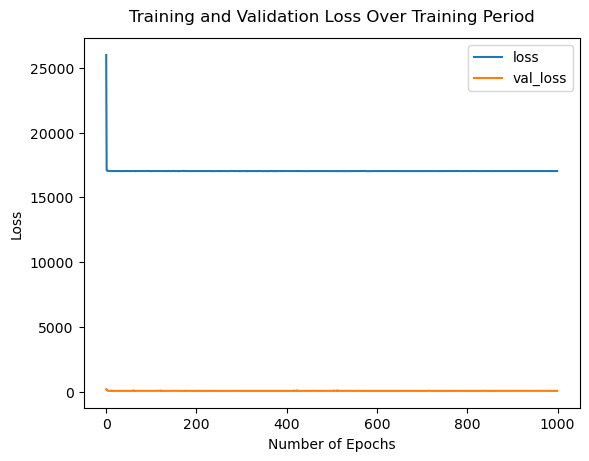

In [36]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

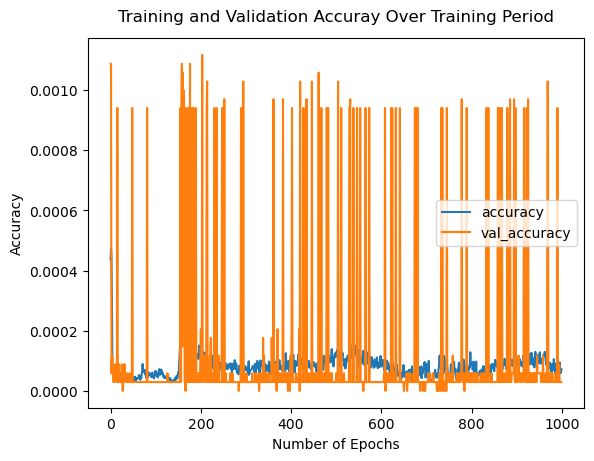

In [37]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.83754%, st_er: 0.002682%
y = 0.7582*x + 3.7969


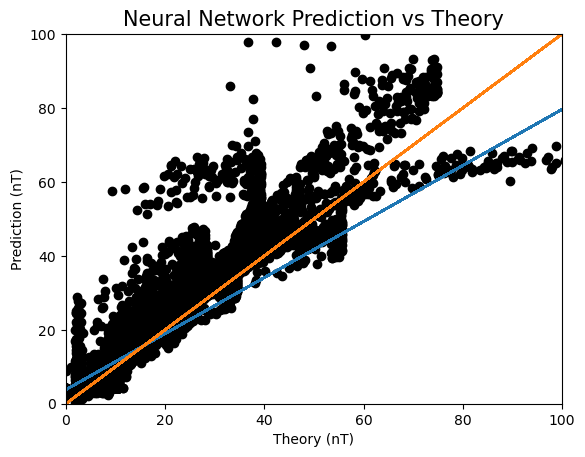

In [38]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

### Erode Prediction
Create an image on 5.1_erode_image.ipynb

### Save model

In [45]:
file = model_path+'model_nonzero_32to38_3layer5unit_1000.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmp7enqfvfu/assets


# Output data

In [46]:
test_pred = model.predict(X4_pred)

1063/1063 [==============================] - 1s 702us/step


In [47]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_60574/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [49]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
931880,36,6,7,32,40,-183.593781,-184.268631,-199.538742,-215.528793,-215.355865,4.988159,6.634568
931881,36,6,7,32,41,-383.761566,-383.066467,-395.916077,-417.522858,-420.110077,4.591202,5.029145
931882,36,6,7,32,42,-779.052185,-785.270813,-803.943787,-811.441101,-799.951233,4.237324,4.198785
931883,36,6,7,32,43,-1017.557312,-1026.294189,-1037.133667,-1050.012451,-1046.674072,3.918999,4.198785
931919,36,6,7,33,15,-1508.948120,-1513.032471,-1527.041992,-1536.478027,-1540.133301,3.371496,4.198785
...,...,...,...,...,...,...,...,...,...,...,...,...
1050968,36,6,36,37,24,-27.330389,-28.598026,-46.617607,-59.281792,-58.657875,7.175758,7.880467
1050979,36,6,36,37,35,171.250366,175.768433,151.715485,130.792816,139.797287,8.527348,16.133213
1050982,36,6,36,37,38,-96.352455,-94.962585,-115.256683,-131.555984,-127.650993,6.039019,10.289098
1050983,36,6,36,37,39,-235.110947,-235.878754,-253.580444,-268.104340,-266.388824,5.501382,7.290627


In [50]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_60574/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [51]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [52]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180224 entries, 901120 to 1081343
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        180224 non-null  int64  
 1   j        180224 non-null  int64  
 2   k        180224 non-null  int64  
 3   predict  180224 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 6.9 MB


In [53]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

In [54]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
931880,7,32,40,6.634568


In [55]:
np.savetxt(img_path+"nn_nonzero_32to38_3layer5unit_1000.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

# AdaBoost 

In [ ]:
shape = (len(X_train[0]),)
def create_model(optimizer="adam"):
    model = keras.Sequential()
    model.add(Dense(8, activation='relu', input_shape=shape)) 
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    return model

In [ ]:
estimator = KerasRegressor(model=create_model, verbose=1)

In [ ]:
ada = AdaBoostRegressor(base_estimator=estimator, random_state=1)
# Default
# n_estimateors = 50, learning_rate = 1.0, loss = 'linear'

In [413]:
ada.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/250
14080/14080 [==============================] - 16s 1ms/step - loss: 55.7692 - accuracy: 0.8112 - val_loss: 36.1058 - val_accuracy: 0.8112
Epoch 2/250
14080/14080 [==============================] - 14s 1ms/step - loss: 27.6695 - accuracy: 0.8113 - val_loss: 26.9031 - val_accuracy: 0.8112
Epoch 3/250
14080/14080 [==============================] - 14s 1ms/step - loss: 22.8049 - accuracy: 0.8113 - val_loss: 24.5247 - val_accuracy: 0.8114
Epoch 4/250
14080/14080 [==============================] - 15s 1ms/step - loss: 20.9147 - accuracy: 0.8114 - val_loss: 22.0434 - val_accuracy: 0.8114
Epoch 5/250
14080/14080 [==============================] - 14s 1ms/step - loss: 19.7160 - accuracy: 0.8114 - val_loss: 21.2492 - val_accuracy: 0.8112
Epoch 6/250
14080/14080 [==============================] - 14s 1ms/step - loss: 18.6955 - accuracy: 0.8114 - val_loss: 19.8251 - val_accuracy: 0.8112
Epoch 7/250
14080/14080 [==============================] - 14s 1ms/step - loss: 18.0138 - accuracy: 

14080/14080 [==============================] - 14s 1ms/step - loss: 10.5037 - accuracy: 0.8112 - val_loss: 10.6257 - val_accuracy: 0.8112
Epoch 110/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4818 - accuracy: 0.8112 - val_loss: 10.5354 - val_accuracy: 0.8112
Epoch 111/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4896 - accuracy: 0.8112 - val_loss: 11.1370 - val_accuracy: 0.8112
Epoch 112/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.4858 - accuracy: 0.8112 - val_loss: 10.6094 - val_accuracy: 0.8112
Epoch 113/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4953 - accuracy: 0.8112 - val_loss: 10.9372 - val_accuracy: 0.8112
Epoch 114/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.5086 - accuracy: 0.8112 - val_loss: 10.4391 - val_accuracy: 0.8112
Epoch 115/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4773 - accuracy: 

Epoch 163/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1857 - accuracy: 0.8112 - val_loss: 10.1182 - val_accuracy: 0.8112
Epoch 164/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1667 - accuracy: 0.8112 - val_loss: 10.2620 - val_accuracy: 0.8112
Epoch 165/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.1372 - accuracy: 0.8112 - val_loss: 10.0696 - val_accuracy: 0.8112
Epoch 166/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1394 - accuracy: 0.8112 - val_loss: 10.1461 - val_accuracy: 0.8112
Epoch 167/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1660 - accuracy: 0.8112 - val_loss: 10.3212 - val_accuracy: 0.8112
Epoch 168/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.1706 - accuracy: 0.8112 - val_loss: 10.1032 - val_accuracy: 0.8112
Epoch 169/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.186

Epoch 217/250
14080/14080 [==============================] - 13s 958us/step - loss: 10.0500 - accuracy: 0.8112 - val_loss: 10.0699 - val_accuracy: 0.8112
Epoch 218/250
14080/14080 [==============================] - 14s 964us/step - loss: 10.0393 - accuracy: 0.8112 - val_loss: 10.0689 - val_accuracy: 0.8112
Epoch 219/250
14080/14080 [==============================] - 14s 965us/step - loss: 10.0445 - accuracy: 0.8112 - val_loss: 10.1081 - val_accuracy: 0.8112
Epoch 220/250
14080/14080 [==============================] - 13s 959us/step - loss: 9.9857 - accuracy: 0.8112 - val_loss: 10.0993 - val_accuracy: 0.8112
Epoch 221/250
14080/14080 [==============================] - 14s 963us/step - loss: 10.0068 - accuracy: 0.8112 - val_loss: 10.1473 - val_accuracy: 0.8112
Epoch 222/250
14080/14080 [==============================] - 14s 969us/step - loss: 9.9952 - accuracy: 0.8112 - val_loss: 10.2371 - val_accuracy: 0.8112
Epoch 223/250
14080/14080 [==============================] - 14s 972us/step - 

In [414]:
train_pred = ada.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = ada.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

28160/28160 [==============================] - 19s 657us/step
10.423523569637522
0.8851849821396331
5632/5632 [==============================] - 4s 675us/step
10.430708006166368
0.901582623329384


In [415]:
ada.score(X_test, y_test)

5632/5632 [==============================] - 5s 914us/step - loss: 10.4307 - accuracy: 0.8112


[10.43068790435791, 0.8112127184867859]

In [416]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.89977946],
       [0.89977946, 1.        ]])

In [415]:
ada.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 914us/step - loss: 10.4307 - accuracy: 0.8112


[10.43068790435791, 0.8112127184867859]

In [416]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.89977946],
       [0.89977946, 1.        ]])

In [417]:
ada.summary()

Model: "sequential_366"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1821 (Dense)          (None, 8)                 48        
                                                                 
 dense_1822 (Dense)          (None, 8)                 72        
                                                                 
 dense_1823 (Dense)          (None, 8)                 72        
                                                                 
 dense_1824 (Dense)          (None, 1)                 9         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [418]:
history.history

{'loss': [55.769195556640625,
  27.669540405273438,
  22.804916381835938,
  20.91471290588379,
  19.715959548950195,
  18.695512771606445,
  18.013818740844727,
  17.217145919799805,
  16.686649322509766,
  16.031967163085938,
  15.589828491210938,
  15.294617652893066,
  15.02783489227295,
  14.763344764709473,
  14.597732543945312,
  14.323282241821289,
  14.098736763000488,
  13.907633781433105,
  13.798909187316895,
  13.676118850708008,
  13.636869430541992,
  13.545592308044434,
  13.4127779006958,
  13.43098258972168,
  13.341645240783691,
  13.244627952575684,
  13.187355995178223,
  13.081528663635254,
  13.008316993713379,
  12.942736625671387,
  12.819374084472656,
  12.7421293258667,
  12.636713027954102,
  12.594244003295898,
  12.439692497253418,
  12.313486099243164,
  12.158864974975586,
  12.000682830810547,
  11.837697982788086,
  11.773954391479492,
  11.691145896911621,
  11.651338577270508,
  11.598064422607422,
  11.588747024536133,
  11.637275695800781,
  11.5778

## Plot

### Loss function (MSE)

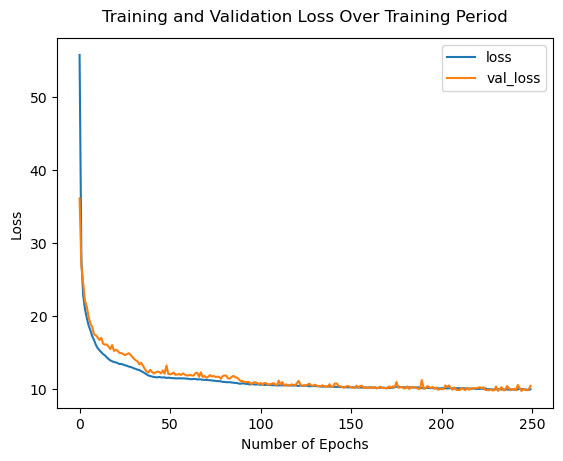

In [419]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

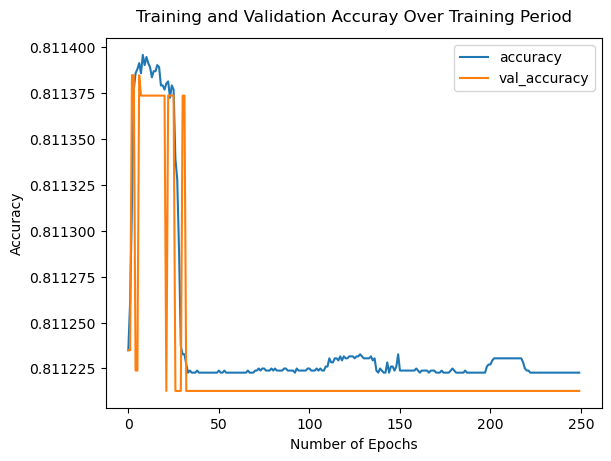

In [420]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.89978%, st_er: 0.000909%
y = 0.7959*x + 0.3686


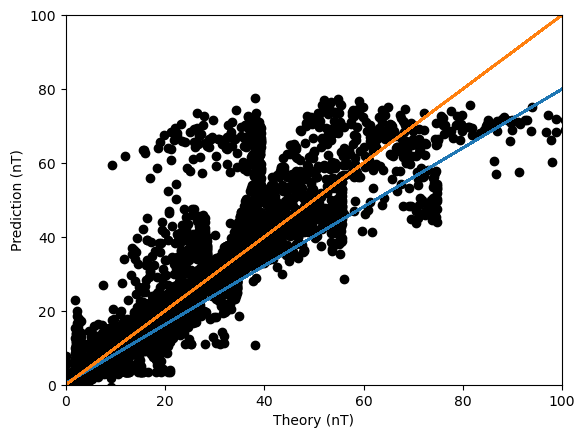

In [421]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

## 7 Layer & 7 Units

In [424]:
model2 = keras.Sequential()
model2.add(Dense(7, activation='relu', input_shape=shape)) 
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adamax', loss='mse', metrics=["accuracy"])

In [425]:
history2 = model2.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=[X_test, y_test])


Epoch 1/250
14080/14080 [==============================] - 16s 1ms/step - loss: 1046.3302 - accuracy: 0.6335 - val_loss: 50.4146 - val_accuracy: 5.5487e-06
Epoch 2/250
14080/14080 [==============================] - 15s 1ms/step - loss: 37.4836 - accuracy: 1.9975e-05 - val_loss: 36.4136 - val_accuracy: 1.6646e-05
Epoch 3/250
14080/14080 [==============================] - 15s 1ms/step - loss: 30.0406 - accuracy: 0.4021 - val_loss: 30.3933 - val_accuracy: 0.8114
Epoch 4/250
14080/14080 [==============================] - 15s 1ms/step - loss: 23.5442 - accuracy: 0.8114 - val_loss: 26.1573 - val_accuracy: 0.8114
Epoch 5/250
14080/14080 [==============================] - 15s 1ms/step - loss: 21.3196 - accuracy: 0.8114 - val_loss: 24.9365 - val_accuracy: 0.8114
Epoch 6/250
14080/14080 [==============================] - 15s 1ms/step - loss: 19.2122 - accuracy: 0.8114 - val_loss: 23.3855 - val_accuracy: 0.8114
Epoch 7/250
14080/14080 [==============================] - 15s 1ms/step - loss: 17.555

14080/14080 [==============================] - 15s 1ms/step - loss: 9.8826 - accuracy: 0.8113 - val_loss: 10.1667 - val_accuracy: 0.8114
Epoch 110/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8702 - accuracy: 0.8113 - val_loss: 10.2380 - val_accuracy: 0.8114
Epoch 111/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.9415 - accuracy: 0.8113 - val_loss: 10.3431 - val_accuracy: 0.8112
Epoch 112/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8992 - accuracy: 0.8113 - val_loss: 9.8778 - val_accuracy: 0.8112
Epoch 113/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8730 - accuracy: 0.8113 - val_loss: 9.9043 - val_accuracy: 0.8112
Epoch 114/250
14080/14080 [==============================] - 16s 1ms/step - loss: 9.8435 - accuracy: 0.8113 - val_loss: 9.8660 - val_accuracy: 0.8114
Epoch 115/250
14080/14080 [==============================] - 16s 1ms/step - loss: 9.7887 - accuracy: 0.8114 - v

14080/14080 [==============================] - 15s 1ms/step - loss: 9.3218 - accuracy: 0.8112 - val_loss: 9.7826 - val_accuracy: 0.8112
Epoch 218/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3371 - accuracy: 0.8112 - val_loss: 9.5755 - val_accuracy: 0.8112
Epoch 219/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3799 - accuracy: 0.8112 - val_loss: 9.5253 - val_accuracy: 0.8112
Epoch 220/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3626 - accuracy: 0.8112 - val_loss: 9.8951 - val_accuracy: 0.8114
Epoch 221/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3454 - accuracy: 0.8112 - val_loss: 9.8686 - val_accuracy: 0.8112
Epoch 222/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3895 - accuracy: 0.8112 - val_loss: 9.7116 - val_accuracy: 0.8112
Epoch 223/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3628 - accuracy: 0.8112 - val_

In [426]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 19s 688us/step
9.358524265784618
1.0455638406507
5632/5632 [==============================] - 4s 684us/step
9.481934435458676
1.0716621402362292


In [427]:
model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 866us/step - loss: 9.4819 - accuracy: 0.8114


[9.481929779052734, 0.8113680481910706]

In [428]:
np.corrcoef(test_pred2.flatten(), y_test)

array([[1.        , 0.90958548],
       [0.90958548, 1.        ]])

In [429]:
model2.summary()

Model: "sequential_367"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1825 (Dense)          (None, 7)                 42        
                                                                 
 dense_1826 (Dense)          (None, 7)                 56        
                                                                 
 dense_1827 (Dense)          (None, 7)                 56        
                                                                 
 dense_1828 (Dense)          (None, 7)                 56        
                                                                 
 dense_1829 (Dense)          (None, 7)                 56        
                                                                 
 dense_1830 (Dense)          (None, 7)                 56        
                                                                 
 dense_1831 (Dense)          (None, 1)              

In [430]:
history2.history

{'loss': [1046.3302001953125,
  37.483638763427734,
  30.040592193603516,
  23.54417610168457,
  21.3195743560791,
  19.2121524810791,
  17.55561065673828,
  16.830585479736328,
  16.048370361328125,
  15.718413352966309,
  15.15301513671875,
  15.153763771057129,
  14.874509811401367,
  14.767585754394531,
  14.562233924865723,
  14.444123268127441,
  14.237424850463867,
  14.06949234008789,
  14.089621543884277,
  13.76307487487793,
  13.555024147033691,
  13.057135581970215,
  12.235762596130371,
  11.770852088928223,
  11.562379837036133,
  11.483296394348145,
  11.319560050964355,
  11.235815048217773,
  11.137860298156738,
  11.024914741516113,
  11.009836196899414,
  10.948224067687988,
  10.913586616516113,
  10.88810920715332,
  10.812581062316895,
  10.799149513244629,
  10.786332130432129,
  10.751015663146973,
  10.730430603027344,
  10.720365524291992,
  10.669264793395996,
  10.594901084899902,
  10.573263168334961,
  10.512391090393066,
  10.481739044189453,
  10.4234876

## Plot

### Loss function (MSE)

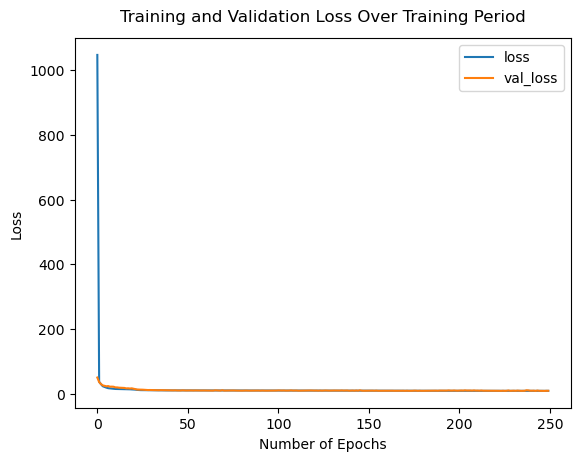

In [431]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

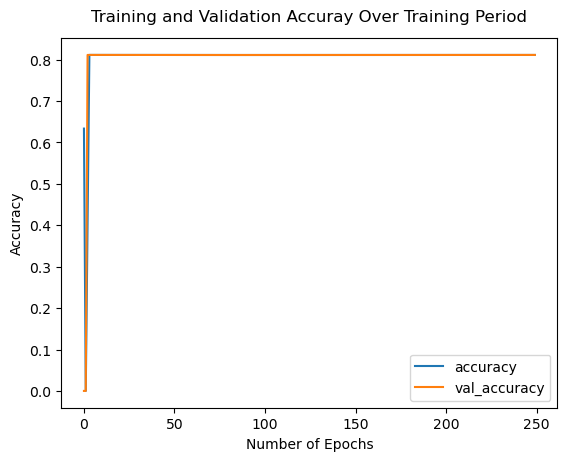

In [432]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.90959%, st_er: 0.000871%
y = 0.8097*x + 0.2675


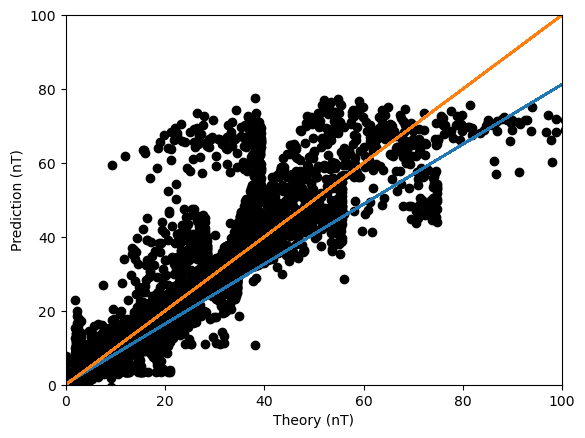

In [433]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [434]:
df_test['predict2'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_34777/3425069941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [435]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict2']], fmt="%i %i %i %s")

# Play Ground

# Old Code

In [157]:
model2 = keras.Sequential()

model2.add(Dense(1, activation='relu', input_shape=(5,)))
model2.add(Dense(1, activation="linear"))

# model2.add(Dense(5, activation='relu', input_shape=(5,)))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7665, MSE 23.21, MAPE 0.9155, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7815, MSE 22.56, MAPE 0.9038, Accuracy 0.8112 

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7894, MSE 21.13, MAPE 0.8703, Accuracy 0.8112 => Best

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7786, MSE 22.19, MAPE 0.8877, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(1))
# # Coef 0.71174903, MSE 28.1933, MAPE 0.9055, Accuracy 0.8114


### BAD ###
# model2.add(Dense(100, activation='relu', input_shape=(5,)))
# model2.add(Dense(50, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.5541, MSE 38.85, MAPE 1.134, Accuracy 0.8112 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef None, MSE 56.06, MAPE 1.656, Accuracy 5.5487e-06 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7285, MSE 26.74, MAPE 1.5369, Accuracy 0.8114 => Bad

# model2.add(Dense(5, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1))
# # Coef 0.7833, MSE 21.68 MAPE 1.197, Accuracy 0.8112 

model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)


Epoch 1/100
 9015/28160 [========>.....................] - ETA: 16s - loss: 56.3059 - accuracy: 0.1151

KeyboardInterrupt: 

In [60]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 20s 697us/step
11.214849205358673
0.8891644970950675
5632/5632 [==============================] - 4s 680us/step
11.220028543186952
0.9035458755417451


In [106]:
arr = np.corrcoef(test_pred2.flatten(), y_test)

In [108]:
arr

array([[1.        , 0.89192917],
       [0.89192917, 1.        ]])

In [62]:
ev = model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 834us/step - loss: 11.2200 - accuracy: 0.8112


In [72]:
ev[1]

0.8112127184867859

In [364]:
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 10)                60        
                                                                 
 dense_128 (Dense)           (None, 10)                110       
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
 dense_130 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [365]:
history2.history

{'loss': [70.53611755371094,
  23.023168563842773,
  22.059120178222656,
  21.485179901123047,
  21.023574829101562,
  21.458295822143555,
  20.747465133666992,
  20.87920379638672,
  20.674291610717773,
  20.560890197753906,
  20.375850677490234],
 'accuracy': [0.8095003962516785,
  0.8013139367103577,
  0.7952991724014282,
  0.7956908941268921,
  0.7943170666694641,
  0.7915316224098206,
  0.8020529747009277,
  0.7983931303024292,
  0.7977461218833923,
  0.8100963234901428,
  0.8075761198997498],
 'val_loss': [31.34503936767578,
  23.02967071533203,
  23.319063186645508,
  22.255678176879883,
  22.685558319091797,
  22.644386291503906,
  22.474851608276367,
  22.245553970336914,
  23.826812744140625,
  23.19800567626953,
  21.347797393798828],
 'val_accuracy': [0.8113847374916077,
  0.8113847374916077,
  0.8113791942596436,
  0.8112071752548218,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112

## Plot

### Loss function (MSE)

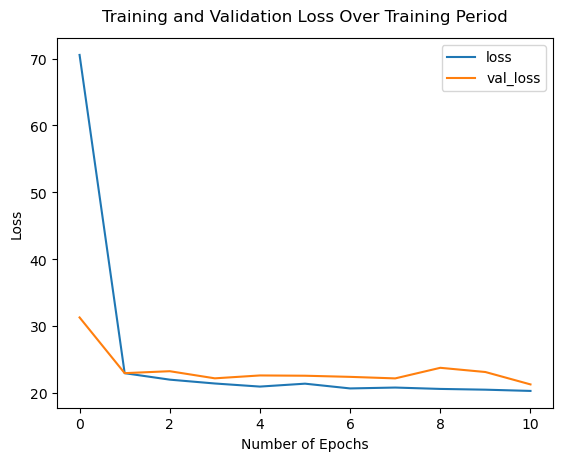

In [391]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

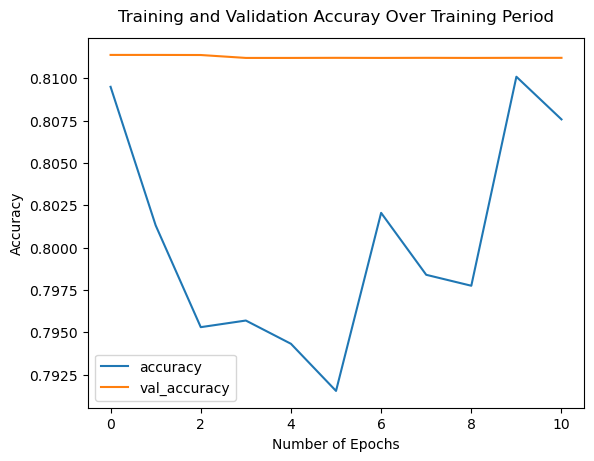

In [392]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.78695%, st_er: 0.001142%
y = 0.6185*x + 0.7269


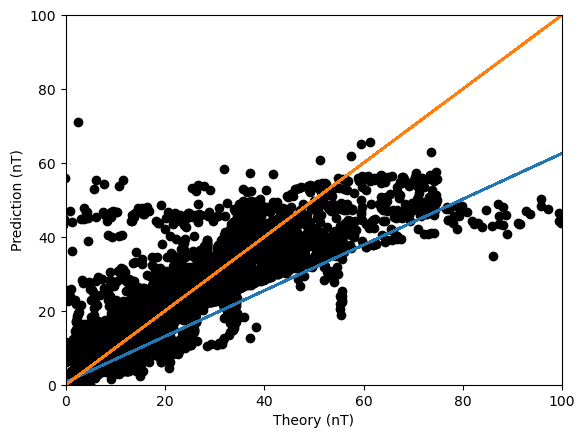

In [393]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [369]:
df_test['predict'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_82638/3293406254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred2


In [370]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

# MLPRegressor

In [63]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train, y_train)

In [64]:
regr.score(X_test, y_test)

0.7235479854252406

In [65]:
y_predict = regr.predict(X_test)

In [66]:
np.corrcoef(y_predict,y_test)

array([[1.        , 0.85849349],
       [0.85849349, 1.        ]])

# Retrieve Heatmap

In [54]:
NaN = np.nan
corr = [[0.087, 0.11, 0.13, 0.12, 0.13, 0.16, 0.14, 0.11, 0.12, 0.15],
       [0.37, 0.8, 0.79, 0.8, 0.69, 0.78, 0.60, 0.82, 0.8, 0.79],
       [0.36, 0.86, 0.89, 0.85, 0.85, 0.87, 0.84, 0.87, 0.89, 0.85],
       [NaN, NaN, NaN, 0.88, 0.86, 0.89, 0.85, 0.9, 0.85, 0.88],
       [NaN, NaN, 0.9, 0.88, 0.9, 0.87, 0.84, 0.89, 0.86, 0.9],
       [NaN, NaN, 0.73, 0.89, 0.89, 0.89, 0.9, 0.89, 0.9, 0.89],
       [NaN, NaN, 0.85, 0.9, 0.88, 0.89, 0.9, 0.9, 0.9, 0.88],
       [NaN, 0.86, NaN, 0.88, 0.81, 0.9, 0.9, 0.89, 0.89, 0.87],
       [NaN, NaN, NaN, 0.9, 0.89, 0.89, 0.9, 0.89, 0.9, 0.9],
       [NaN, NaN, NaN, 0.87, 0.9, 0.88, 0.9, 0.89, 0.9, 0.9]
       ]

In [55]:
err = [[0.00084, 0.00075, 0.00088, 0.00073, 0.00086, 0.00089, 0.001, 0.00064, 0.0005, 0.0011],
       [0.00072, 0.001, 0.0011, 0.00091, 0.0014, 0.0012, 0.0015, 0.001, 0.00094, 0.00086],
       [0.0007, 0.00093, 0.00096, 0.00099, 0.00098, 0.00093, 0.0011, 0.00092, 0.00096, 0.00094],
       [0, 0, 0, 0.00093, 0.0012, 0.00091, 0.00099, 0.00086, 0.001, 0.0009],
       [0, 0, 0.00096, 0.00094, 0.00093, 0.0011, 0.0011, 0.00092, 0.0012, 0.00086],
       [0, 0, 0.0011, 0.00091, 0.00096, 0.0009, 0.00089, 0.0009, 0.00089, 0.00091],
       [0, 0, 0.0012, 0.00095, 0.00087, 0.0011, 0.00087, 0.00086, 0.00085, 0.00093],
       [0, 0.00087, 0, 0.0011, 0.0016, 0.00092, 0.00087, 0.0011, 0.00088, 0.0012],
       [0, 0, 0, 0.00094, 0.00085, 0.0009, 0.00087, 0.00087, 0.00096, 0.001],
       [0, 0, 0, 0.00098, 0.00089, 0.0011, 0.00097, 0.00096, 0.00094, 0.00096],
      ]

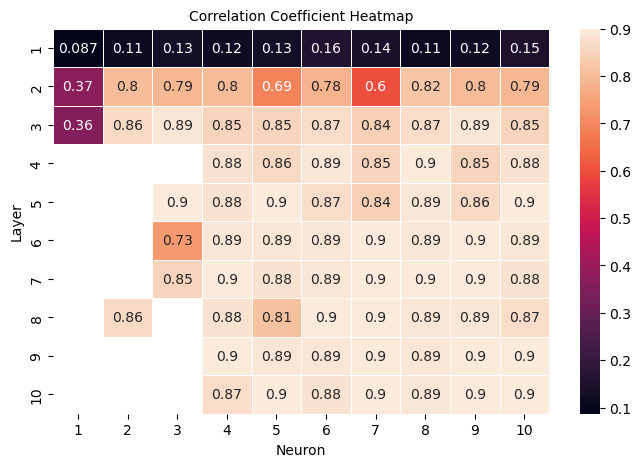

In [56]:
import seaborn as sns

xlabels = range(1, 11)
ylabels = range(1, 11)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Correlation Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

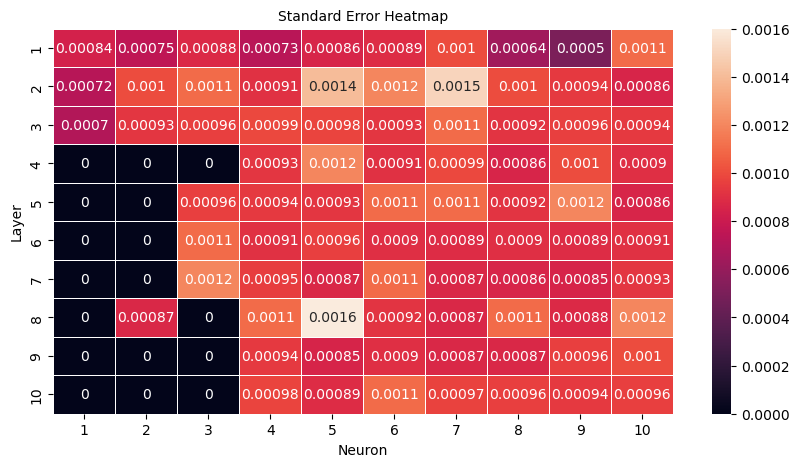

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [93]:
div = np.divide(corr, err)
div = np.nan_to_num(div)
div

array([[ 103.57142857,  146.66666667,  147.72727273,  164.38356164,
         151.1627907 ,  179.7752809 ,  140.        ,  171.875     ,
         240.        ,  136.36363636],
       [ 513.88888889,  800.        ,  718.18181818,  879.12087912,
         492.85714286,  650.        ,  400.        ,  820.        ,
         851.06382979,  918.60465116],
       [ 514.28571429,  924.7311828 ,  927.08333333,  858.58585859,
         867.34693878,  935.48387097,  763.63636364,  945.65217391,
         927.08333333,  904.25531915],
       [   0.        ,    0.        ,    0.        ,  946.23655914,
         716.66666667,  978.02197802,  858.58585859, 1046.51162791,
         850.        ,  977.77777778],
       [   0.        ,    0.        ,  937.5       ,  936.17021277,
         967.74193548,  790.90909091,  763.63636364,  967.39130435,
         716.66666667, 1046.51162791],
       [   0.        ,    0.        ,  663.63636364,  978.02197802,
         927.08333333,  988.88888889, 1011.23595506,  988

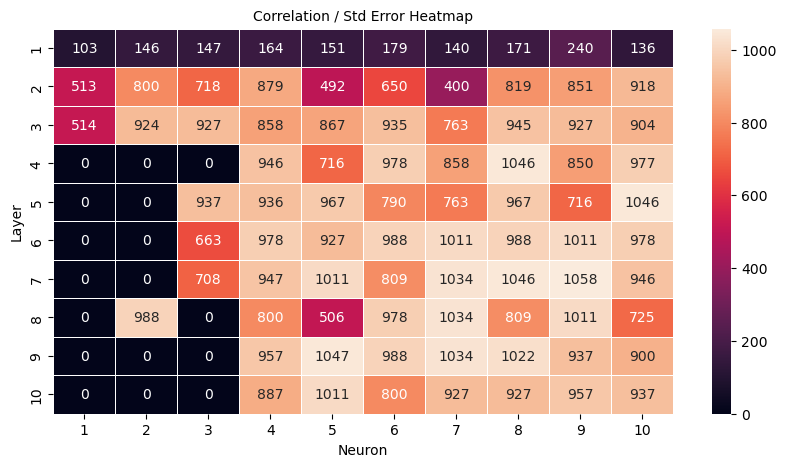

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='d')
ax.set_title('Correlation / Std Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [61]:
loss = [[58, 56, 57, 56, 57, 56, 59, 55, 54, 59], 
        [48, 20, 21, 21, 30, 21, 30, 18, 20, 23], 
        [48, 15, 11, 15, 15, 13, 16, 14, 12, 16], 
        [55, 55, 55, 12, 15, 12, 15, 10, 15, 12], 
        [55, 55, 11, 13, 10, 14, 16, 12, 16, 11], 
        [55, 55, 26, 11, 11, 11, 10, 11, 11, 11], 
        [55, 55, 17, 11, 12, 12, 10, 10, 11, 12], 
        [55, 15, 55, 14, 25, 10, 11, 12, 11, 14], 
        [55, 55, 55, 11, 12, 12, 11, 11, 10, 11], 
        [55, 55, 55, 13, 11, 13, 10, 11, 10, 11]
       ]

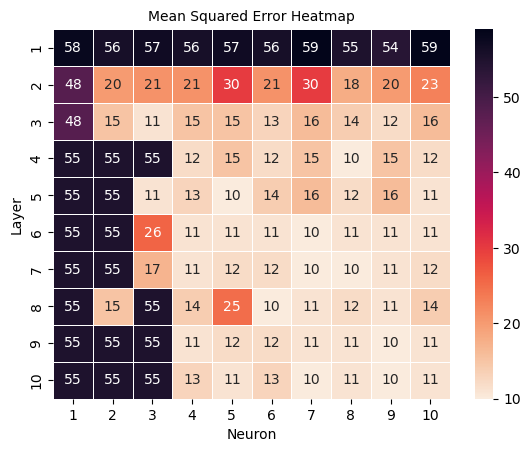

In [70]:
#fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(loss, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, cmap='rocket_r')
ax.set_title('Mean Squared Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [89]:
div2 = np.divide(div.astype(int), loss)
div2

array([[  1.77586207,   2.60714286,   2.57894737,   2.92857143,
          2.64912281,   3.19642857,   2.37288136,   3.10909091,
          4.44444444,   2.30508475],
       [ 10.6875    ,  40.        ,  34.19047619,  41.85714286,
         16.4       ,  30.95238095,  13.33333333,  45.5       ,
         42.55      ,  39.91304348],
       [ 10.70833333,  61.6       ,  84.27272727,  57.2       ,
         57.8       ,  71.92307692,  47.6875    ,  67.5       ,
         77.25      ,  56.5       ],
       [  0.        ,   0.        ,   0.        ,  78.83333333,
         47.73333333,  81.5       ,  57.2       , 104.6       ,
         56.66666667,  81.41666667],
       [  0.        ,   0.        ,  85.18181818,  72.        ,
         96.7       ,  56.42857143,  47.6875    ,  80.58333333,
         44.75      ,  95.09090909],
       [  0.        ,   0.        ,  25.5       ,  88.90909091,
         84.27272727,  89.81818182, 101.1       ,  89.81818182,
         91.90909091,  88.90909091],
       [  

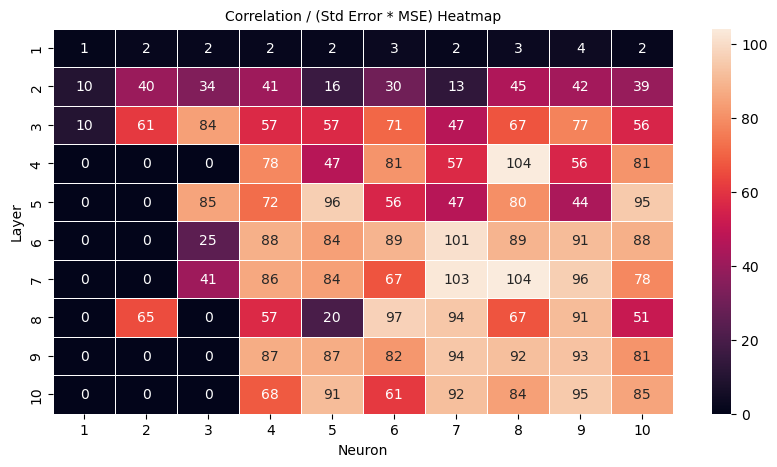

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div2.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='g')
ax.set_title('Correlation / (Std Error * MSE) Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [31]:
xlabels = range(1, 11)
ylabels = range(1, 11)

In [23]:
NaN = np.nan
corr = [[0.42, 0.41, 0.4, 0.41, 0.41, 0.42, 0.41, 0.42, 0.42, 0.42],
       [0.42, 0.72, 0.082, 0.72, 0.46, 0.44, 0.5, 0.4, 0.57, 0.6],
       [NaN, 0.66, 0.68, 0.65, 0.79, 0.8, 0.61, 0.37, 0.22, 0.76],
       [0.71, 0.69, 0.79, 0.49, 0.61, 0.73, 0.37, 0.75, 0.66, 0.7],
       [NaN, NaN, NaN, 0.34, 0.78, 0.64, 0.8, 0.81, 0.77, 0.74],
       [NaN, NaN, NaN, 0.74, 0.7, 0.69, 0.65, 0.46, 0.73, 0.59],
       [NaN, NaN, 0.65, 0.24, 0.71, 0.47, 0.74, 0.69, 0.52, 0.77],
       [NaN, NaN, 0.81, 0.79, NaN, 0.62, 0.58, 0.56, 0.61, 0.75],
       [NaN, NaN, NaN, NaN, 0.53, 0.65, 0.64, 0.65, 0.66, 0.79],
       [NaN, NaN, NaN, 0.79, 0.78, 0.7, NaN, 0.69, 0.54, 0.81]
       ]

In [24]:
err = [[0.0019, 0.0014, 0.0013, 0.0016, 0.0013, 0.0017, 0.0012, 0.0021, 0.0013, 0.0025],
       [0.0016, 0.0022, 0.0014, 0.0026, 0.0015, 0.0015, 0.002, 0.0018, 0.0018, 0.0022],
       [0, 0.0022, 0.0016, 0.002, 0.0019, 0.0025, 0.0021, 0.0025, 0.0026, 0.0021],
       [0.0024, 0.0021, 0.0021, 0.0018, 0.002, 0.0024, 0.0013, 0.0023, 0.0024, 0.0021],
       [0, 0, 0, 0.0017, 0.0023, 0.0015, 0.0024, 0.002, 0.0026, 0.0021],
       [0, 0, 0, 0.0017, 0.003, 0.0021, 0.0014, 0.0022, 0.0031, 0.0024],
       [0, 0, 0.0025, 0.0011, 0.0024, 0.0016, 0.0025, 0.002, 0.002, 0.0027],
       [0, 0, 0.0026, 0.0021, 0, 0.0031, 0.0018, 0.0025, 0.002, 0.0025],
       [0, 0, 0, 0, 0.0016, 0.0016, 0.0022, 0.0038, 0.0031, 0.0025],
       [0, 0, 0, 0.0022, 0.0027, 0.0029, 0, 0.0022, 0.0025, 0.0024],
      ]

In [25]:
div = np.divide(corr, err)
div = np.nan_to_num(div)
div

array([[221.05263158, 292.85714286, 307.69230769, 256.25      ,
        315.38461538, 247.05882353, 341.66666667, 200.        ,
        323.07692308, 168.        ],
       [262.5       , 327.27272727,  58.57142857, 276.92307692,
        306.66666667, 293.33333333, 250.        , 222.22222222,
        316.66666667, 272.72727273],
       [  0.        , 300.        , 425.        , 325.        ,
        415.78947368, 320.        , 290.47619048, 148.        ,
         84.61538462, 361.9047619 ],
       [295.83333333, 328.57142857, 376.19047619, 272.22222222,
        305.        , 304.16666667, 284.61538462, 326.08695652,
        275.        , 333.33333333],
       [  0.        ,   0.        ,   0.        , 200.        ,
        339.13043478, 426.66666667, 333.33333333, 405.        ,
        296.15384615, 352.38095238],
       [  0.        ,   0.        ,   0.        , 435.29411765,
        233.33333333, 328.57142857, 464.28571429, 209.09090909,
        235.48387097, 245.83333333],
       [  

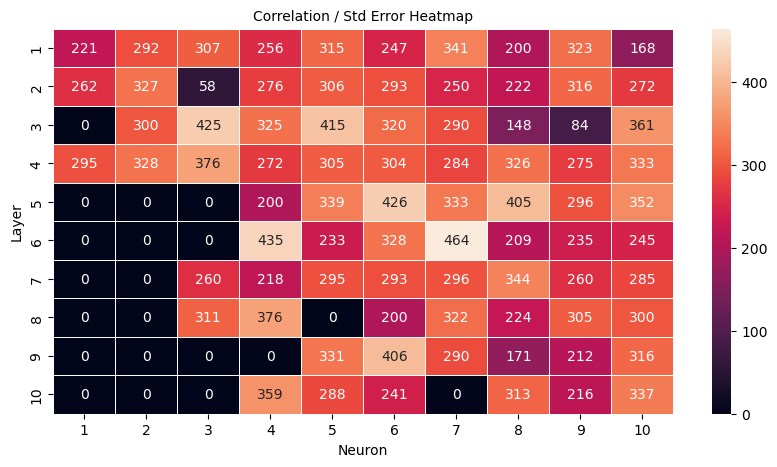

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='d')
ax.set_title('Correlation / Std Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [28]:
loss = [[160, 160, 160, 160, 160, 160, 160, 170, 160, 180], 
        [160, 97, 200, 95, 170, 160, 160, 160, 130, 120], 
        [190, 110, 120, 120, 80, 68, 120, 170, 210, 85], 
        [94, 100, 77, 150, 130, 91, 170, 84, 110, 100], 
        [190, 190, 190, 170, 79, 140, 70, 71, 79, 93], 
        [190, 190, 190, 99, 98, 100, 130, 150, 91, 120], 
        [190, 190, 110, 180, 96, 160, 85, 110, 150, 76], 
        [190, 190, 67, 78, 190, 120, 130, 130, 130, 84], 
        [190, 190, 190, 190, 150, 140, 120, 130, 110, 74], 
        [190, 190, 190, 74, 73, 100, 190, 100, 140, 70]
       ]

In [29]:
div2 = np.divide(div.astype(int), loss)
div2

array([[1.38125   , 1.825     , 1.91875   , 1.6       , 1.96875   ,
        1.54375   , 2.13125   , 1.17647059, 2.01875   , 0.93333333],
       [1.6375    , 3.37113402, 0.29      , 2.90526316, 1.8       ,
        1.83125   , 1.5625    , 1.3875    , 2.43076923, 2.26666667],
       [0.        , 2.72727273, 3.54166667, 2.70833333, 5.1875    ,
        4.70588235, 2.41666667, 0.87058824, 0.4       , 4.24705882],
       [3.13829787, 3.28      , 4.88311688, 1.81333333, 2.34615385,
        3.34065934, 1.67058824, 3.88095238, 2.5       , 3.33      ],
       [0.        , 0.        , 0.        , 1.17647059, 4.29113924,
        3.04285714, 4.75714286, 5.70422535, 3.74683544, 3.78494624],
       [0.        , 0.        , 0.        , 4.39393939, 2.37755102,
        3.28      , 3.56923077, 1.39333333, 2.58241758, 2.04166667],
       [0.        , 0.        , 2.36363636, 1.21111111, 3.07291667,
        1.83125   , 3.48235294, 3.12727273, 1.73333333, 3.75      ],
       [0.        , 0.        , 4.6417910

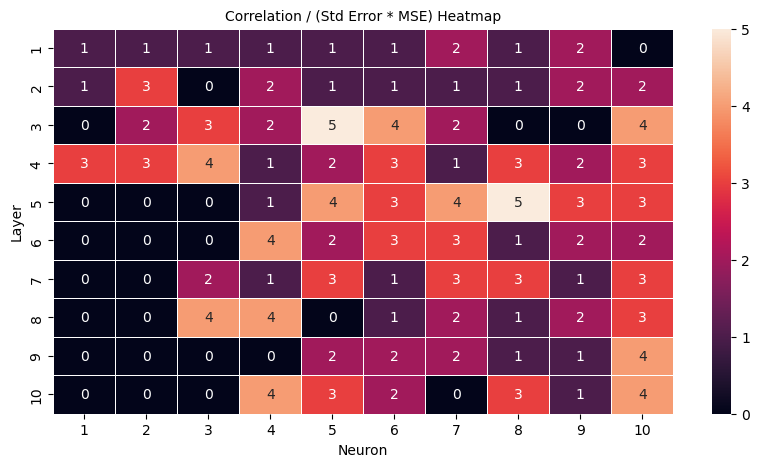

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div2.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='g')
ax.set_title('Correlation / (Std Error * MSE) Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [ ]:
# Play Ground

NaN = np.nan
corr = [[0.087, 0.11, 0.13, 0.12, 0.13, 0.16, 0.14, 0.11, 0.12, 0.15],
       [0.37, 0.8, 0.79, 0.8, 0.69, 0.78, 0.60, 0.82, 0.8, 0.79],
       [0.36, 0.86, 0.89, 0.85, 0.85, 0.87, 0.84, 0.87, 0.89, 0.85],
       [NaN, NaN, NaN, 0.88, 0.86, 0.89, 0.85, 0.9, 0.85, 0.88],
       [NaN, NaN, 0.9, 0.88, 0.9, 0.87, 0.84, 0.89, 0.86, 0.9],
       [NaN, NaN, 0.73, 0.89, 0.89, 0.89, 0.9, 0.89, 0.9, 0.89],
       [NaN, NaN, 0.85, 0.9, 0.88, 0.89, 0.9, 0.9, 0.9, 0.88],
       [NaN, 0.86, NaN, 0.88, 0.81, 0.9, 0.9, 0.89, 0.89, 0.87],
       [NaN, NaN, NaN, 0.9, 0.89, 0.89, 0.9, 0.89, 0.9, 0.9],
       [NaN, NaN, NaN, 0.87, 0.9, 0.88, 0.9, 0.89, 0.9, 0.9]
       ]

err = [[0.00084, 0.00075, 0.00088, 0.00073, 0.00086, 0.00089, 0.001, 0.00064, 0.0005, 0.0011],
       [0.00072, 0.001, 0.0011, 0.00091, 0.0014, 0.0012, 0.0015, 0.001, 0.00094, 0.00086],
       [0.0007, 0.00093, 0.00096, 0.00099, 0.00098, 0.00093, 0.0011, 0.00092, 0.00096, 0.00094],
       [0, 0, 0, 0.00093, 0.0012, 0.00091, 0.00099, 0.00086, 0.001, 0.0009],
       [0, 0, 0.00096, 0.00094, 0.00093, 0.0011, 0.0011, 0.00092, 0.0012, 0.00086],
       [0, 0, 0.0011, 0.00091, 0.00096, 0.0009, 0.00089, 0.0009, 0.00089, 0.00091],
       [0, 0, 0.0012, 0.00095, 0.00087, 0.0011, 0.00087, 0.00086, 0.00085, 0.00093],
       [0, 0.00087, 0, 0.0011, 0.0016, 0.00092, 0.00087, 0.0011, 0.00088, 0.0012],
       [0, 0, 0, 0.00094, 0.00085, 0.0009, 0.00087, 0.00087, 0.00096, 0.001],
       [0, 0, 0, 0.00098, 0.00089, 0.0011, 0.00097, 0.00096, 0.00094, 0.00096],
      ]

import seaborn as sns

xlabels = range(1, 11)
ylabels = range(1, 11)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Correlation Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

div = np.divide(corr, err)
div = np.nan_to_num(div)
div

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='d')
ax.set_title('Correlation / Std Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

loss = [[58, 56, 57, 56, 57, 56, 59, 55, 54, 59], 
        [48, 20, 21, 21, 30, 21, 30, 18, 20, 23], 
        [48, 15, 11, 15, 15, 13, 16, 14, 12, 16], 
        [55, 55, 55, 12, 15, 12, 15, 10, 15, 12], 
        [55, 55, 11, 13, 10, 14, 16, 12, 16, 11], 
        [55, 55, 26, 11, 11, 11, 10, 11, 11, 11], 
        [55, 55, 17, 11, 12, 12, 10, 10, 11, 12], 
        [55, 15, 55, 14, 25, 10, 11, 12, 11, 14], 
        [55, 55, 55, 11, 12, 12, 11, 11, 10, 11], 
        [55, 55, 55, 13, 11, 13, 10, 11, 10, 11]
       ]

#fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(loss, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, cmap='rocket_r')
ax.set_title('Mean Squared Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

div2 = np.divide(div.astype(int), loss)
div2

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div2.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='g')
ax.set_title('Correlation / (Std Error * MSE) Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()



xlabels = range(1, 11)
ylabels = range(1, 11)

NaN = np.nan
corr = [[0.42, 0.41, 0.4, 0.41, 0.41, 0.42, 0.41, 0.42, 0.42, 0.42],
       [0.42, 0.72, 0.082, 0.72, 0.46, 0.44, 0.5, 0.4, 0.57, 0.6],
       [NaN, 0.66, 0.68, 0.65, 0.79, 0.8, 0.61, 0.37, 0.22, 0.76],
       [0.71, 0.69, 0.79, 0.49, 0.61, 0.73, 0.37, 0.75, 0.66, 0.7],
       [NaN, NaN, NaN, 0.34, 0.78, 0.64, 0.8, 0.81, 0.77, 0.74],
       [NaN, NaN, NaN, 0.74, 0.7, 0.69, 0.65, 0.46, 0.73, 0.59],
       [NaN, NaN, 0.65, 0.24, 0.71, 0.47, 0.74, 0.69, 0.52, 0.77],
       [NaN, NaN, 0.81, 0.79, NaN, 0.62, 0.58, 0.56, 0.61, 0.75],
       [NaN, NaN, NaN, NaN, 0.53, 0.65, 0.64, 0.65, 0.66, 0.79],
       [NaN, NaN, NaN, 0.79, 0.78, 0.7, NaN, 0.69, 0.54, 0.81]
       ]

err = [[0.0019, 0.0014, 0.0013, 0.0016, 0.0013, 0.0017, 0.0012, 0.0021, 0.0013, 0.0025],
       [0.0016, 0.0022, 0.0014, 0.0026, 0.0015, 0.0015, 0.002, 0.0018, 0.0018, 0.0022],
       [0, 0.0022, 0.0016, 0.002, 0.0019, 0.0025, 0.0021, 0.0025, 0.0026, 0.0021],
       [0.0024, 0.0021, 0.0021, 0.0018, 0.002, 0.0024, 0.0013, 0.0023, 0.0024, 0.0021],
       [0, 0, 0, 0.0017, 0.0023, 0.0015, 0.0024, 0.002, 0.0026, 0.0021],
       [0, 0, 0, 0.0017, 0.003, 0.0021, 0.0014, 0.0022, 0.0031, 0.0024],
       [0, 0, 0.0025, 0.0011, 0.0024, 0.0016, 0.0025, 0.002, 0.002, 0.0027],
       [0, 0, 0.0026, 0.0021, 0, 0.0031, 0.0018, 0.0025, 0.002, 0.0025],
       [0, 0, 0, 0, 0.0016, 0.0016, 0.0022, 0.0038, 0.0031, 0.0025],
       [0, 0, 0, 0.0022, 0.0027, 0.0029, 0, 0.0022, 0.0025, 0.0024],
      ]

div = np.divide(corr, err)
div = np.nan_to_num(div)
div

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='d')
ax.set_title('Correlation / Std Error Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

loss = [[160, 160, 160, 160, 160, 160, 160, 170, 160, 180], 
        [160, 97, 200, 95, 170, 160, 160, 160, 130, 120], 
        [190, 110, 120, 120, 80, 68, 120, 170, 210, 85], 
        [94, 100, 77, 150, 130, 91, 170, 84, 110, 100], 
        [190, 190, 190, 170, 79, 140, 70, 71, 79, 93], 
        [190, 190, 190, 99, 98, 100, 130, 150, 91, 120], 
        [190, 190, 110, 180, 96, 160, 85, 110, 150, 76], 
        [190, 190, 67, 78, 190, 120, 130, 130, 130, 84], 
        [190, 190, 190, 190, 150, 140, 120, 130, 110, 74], 
        [190, 190, 190, 74, 73, 100, 190, 100, 140, 70]
       ]

div2 = np.divide(div.astype(int), loss)
div2

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div2.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='g')
ax.set_title('Correlation / (Std Error * MSE) Heatmap', fontsize=10)
ax.set_xlabel('Neuron', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()